# **Project Title**


Zomato_Restaurant_Clustering_And_Sentiment_Analysis

---



# **Business context**

Zomato is an Indian restaurant aggregator and food delivery start-up founded by Deepinder Goyal and Pankaj Chaddah in 2008. Zomato provides informaEon, menus, and user-reviews of restaurants, and also has food delivery opEons from partner restaurants in select ciEes. India is quite famous for its diverse mulE cuisine available in a large number of restaurants and hotel resorts, which is reminiscent of unity in diversity.
Restaurant business in India is always evolving. More Indians are warming up to the idea of eaEng restaurant food whether by dining outside or geKng food delivered. The growing number of restaurants in every state of India has been a moEvaEon to inspect the data to get some insights, interesEng facts and figures about the Indian food industry in each city. So, this project focuses on analysing the Zomato restaurant data for
each city in India

# **Project Description**

It's an unsupervised machine learning project wherein we need to cluster restaurants and conduct sentiment analysis on customer reviews. We're working with two datasets: "restaurant" with 105 rows and 6 columns, and "review" with 10,000 rows and 7 columns. Our objectives include dataset exploration, deriving meaningful insights, generating visual charts, addressing missing values and outliers, and ultimately conducting clustering and sentiment analysis to draw final conclusions.

# **Datasets Description**

**Zomato Restaurant**

*   Name : Name of Restaurants

*   Links : URL Links of Restaurants

*   Cost : Per person estimated Cost of dining

*   Collection : Tagging of Restaurants w.r.t. Zomato categories

*   Cuisines : Cuisines served by Restaurants

*   Timings : Restaurant Timings




**Zomato Restaurant Reviews**


*   Restaurant : Name of the Restaurant

*   Reviewer : Name of the Reviewer

*   Review : Review Text

*   Rating : Rating Provided by Reviewer

*   MetaData : Reviewer Metadata - No. of Reviews and followers

*   Time: Date and Time of Review

*   Pictures : No. of pictures posted with review





















# **GitHub Link**

https://github.com/bkrsannapureddy/Zomato-Resturant-Clustering-and-Sentiment-Analysis-.git

# **Activity diagram**

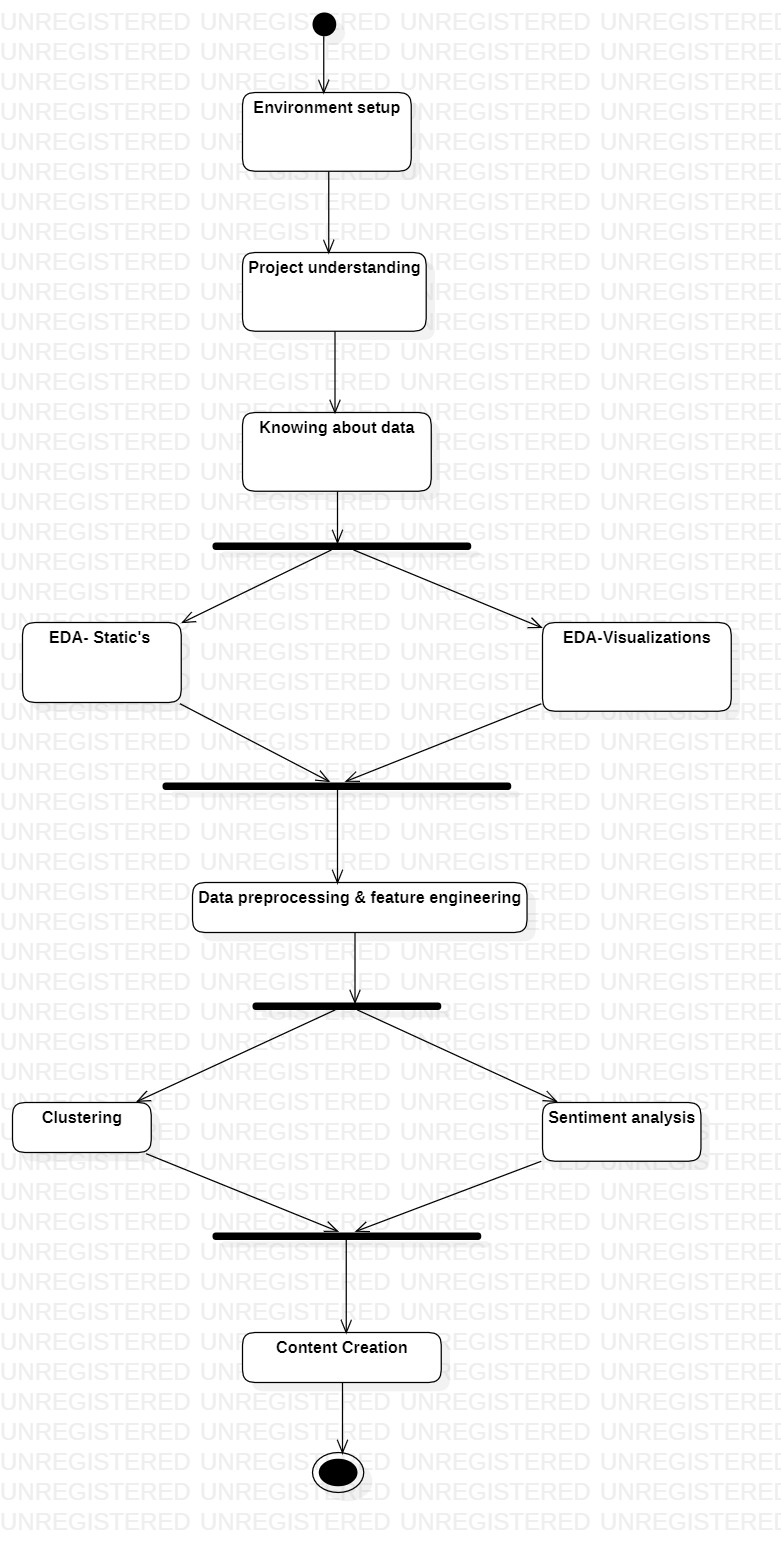

# **Exploratory data analysis(EDA)**

# **Knowing about Data**

Importing packages

In [ ]:
# Import Libraries
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")


Datasets loading

In [ ]:
from google.colab import drive
drive.mount("/content/drive/", force_remount=True)
drive.mount('/content/drive/')
data1_path='/content/drive/MyDrive/Zomato Restaurant names and Metadata.csv'
restaurant1=pd.read_csv(data1_path)
data2_path='/content/drive/MyDrive/Zomato Restaurant reviews.csv'
review1=pd.read_csv(data2_path)

Mounted at /content/drive/
Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


Undestanding variables

In [ ]:
restaurant1.head()

,Name,Links,Cost,Collections,Cuisines,Timings
0,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)"
1,Paradise,https://www.zomato.com/hyderabad/paradise-gach...,800,Hyderabad's Hottest,"Biryani, North Indian, Chinese",11 AM to 11 PM
2,Flechazo,https://www.zomato.com/hyderabad/flechazo-gach...,"1,300","Great Buffets, Hyderabad's Hottest","Asian, Mediterranean, North Indian, Desserts","11:30 AM to 4:30 PM, 6:30 PM to 11 PM"
3,Shah Ghouse Hotel & Restaurant,https://www.zomato.com/hyderabad/shah-ghouse-h...,800,Late Night Restaurants,"Biryani, North Indian, Chinese, Seafood, Bever...",12 Noon to 2 AM
4,Over The Moon Brew Company,https://www.zomato.com/hyderabad/over-the-moon...,"1,200","Best Bars & Pubs, Food Hygiene Rated Restauran...","Asian, Continental, North Indian, Chinese, Med...","12noon to 11pm (Mon, Tue, Wed, Thu, Sun), 12no..."


In [ ]:
review1.head()

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5,"1 Review , 2 Followers",5/25/2019 15:54,0
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5,"3 Reviews , 2 Followers",5/25/2019 14:20,0
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5,"2 Reviews , 3 Followers",5/24/2019 22:54,0
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5,"1 Review , 1 Follower",5/24/2019 22:11,0
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5,"3 Reviews , 2 Followers",5/24/2019 21:37,0


In [ ]:
print(f'Total no.of rows and columns for restaurants: {restaurant1.shape}')
print(f'Total no.of rows and columns for reviews: {review1.shape}')

Total no.of rows and columns for restaurants: (105, 6)
Total no.of rows and columns for reviews: (10000, 7)


In [ ]:
print('Restaurant Info')
print('\n')
restaurant1.info()
print('-'*120)
print('\n')
print('Review Info')
print('\n')
review1.info()

Restaurant Info


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Name         105 non-null    object
 1   Links        105 non-null    object
 2   Cost         105 non-null    object
 3   Collections  51 non-null     object
 4   Cuisines     105 non-null    object
 5   Timings      104 non-null    object
dtypes: object(6)
memory usage: 5.0+ KB
------------------------------------------------------------------------------------------------------------------------


Review Info


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Restaurant  10000 non-null  object
 1   Reviewer    9962 non-null   object
 2   Review      9955 non-null   object
 3   Rating      9962 non-null   object
 4   Metadata    9962 non-

In [ ]:
# Dataset Duplicate Values Count
print('For Restaurant')
print('\n')
print(f"Data is duplicated ? {restaurant1.duplicated().value_counts()},unique values with {len(restaurant1[restaurant1.duplicated()])} duplication")
print('\n')
print('-'*120)
print('')
print('For Reviews')
print('\n')
print(f"Data is duplicated ? {review1.duplicated().value_counts()},unique values with {len(review1[review1.duplicated()])} duplication")

For Restaurant


Data is duplicated ? False    105
dtype: int64,unique values with 0 duplication


------------------------------------------------------------------------------------------------------------------------

For Reviews


Data is duplicated ? False    9964
True       36
dtype: int64,unique values with 36 duplication


In [ ]:
# Check Unique Values for each variable for reviews
for i in review1.columns:
  print("No. of unique values in ",i,"is",review1[i].nunique(),".")

No. of unique values in  Restaurant is 100 .
No. of unique values in  Reviewer is 7446 .
No. of unique values in  Review is 9364 .
No. of unique values in  Rating is 10 .
No. of unique values in  Metadata is 2477 .
No. of unique values in  Time is 9782 .
No. of unique values in  Pictures is 36 .


In [ ]:
#getting duplicate values
print(f' Duplicate data count = {review1[review1.duplicated()].shape[0]}')
review1[review1.duplicated()]

 Duplicate data count = 36


,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures
8778,American Wild Wings,NaN,NaN,NaN,NaN,NaN,0
8779,American Wild Wings,NaN,NaN,NaN,NaN,NaN,0
8780,American Wild Wings,NaN,NaN,NaN,NaN,NaN,0
8781,American Wild Wings,NaN,NaN,NaN,NaN,NaN,0
8782,American Wild Wings,NaN,NaN,NaN,NaN,NaN,0
8783,American Wild Wings,NaN,NaN,NaN,NaN,NaN,0
8784,American Wild Wings,NaN,NaN,NaN,NaN,NaN,0
8785,American Wild Wings,NaN,NaN,NaN,NaN,NaN,0
8786,American Wild Wings,NaN,NaN,NaN,NaN,NaN,0
8787,American Wild Wings,NaN,NaN,NaN,NaN,NaN,0


In [ ]:
restaurant1.isnull().sum()

Name            0
Links           0
Cost            0
Collections    54
Cuisines        0
Timings         1
dtype: int64

In [ ]:
review1.isnull().sum()

Restaurant     0
Reviewer      38
Review        45
Rating        38
Metadata      38
Time          38
Pictures       0
dtype: int64

In [ ]:
# Dataset Columns restaurant
print(f'Features : {restaurant1.columns}')

Features : Index(['Name', 'Links', 'Cost', 'Collections', 'Cuisines', 'Timings'], dtype='object')


In [ ]:
# Dataset Columns reviews
print(f'Features : {review1.columns}')

Features : Index(['Restaurant', 'Reviewer', 'Review', 'Rating', 'Metadata', 'Time',
       'Pictures'],
      dtype='object')


In [ ]:
# Dataset Describe restaurant
restaurant1.describe()

,Name,Links,Cost,Collections,Cuisines,Timings
count,105,105,105,51,105,104
unique,105,105,29,42,92,77
top,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,500,Food Hygiene Rated Restaurants in Hyderabad,"North Indian, Chinese",11 AM to 11 PM
freq,1,1,13,4,4,6


In [ ]:
# Dataset Describe review
review1.describe(include='all')

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures
count,10000,9962,9955,9962,9962,9962,10000.000000
unique,100,7446,9364,10,2477,9782,NaN
top,Beyond Flavours,Parijat Ray,good,5,1 Review,7/29/2018 20:34,NaN
freq,100,13,237,3832,919,3,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,0.748600
std,NaN,NaN,NaN,NaN,NaN,NaN,2.570381
min,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,0.000000


In [ ]:
# Check Unique Values for each variable for restaurant
for i in restaurant1.columns:
  print("No. of unique values in ",i,"is",restaurant1[i].nunique(),".")

No. of unique values in  Name is 105 .
No. of unique values in  Links is 105 .
No. of unique values in  Cost is 29 .
No. of unique values in  Collections is 42 .
No. of unique values in  Cuisines is 92 .
No. of unique values in  Timings is 77 .


In [ ]:
# Check Unique Values for each variable for reviews
for i in review1.columns:
  print("No. of unique values in ",i,"is",review1[i].nunique(),".")

No. of unique values in  Restaurant is 100 .
No. of unique values in  Reviewer is 7446 .
No. of unique values in  Review is 9364 .
No. of unique values in  Rating is 10 .
No. of unique values in  Metadata is 2477 .
No. of unique values in  Time is 9782 .
No. of unique values in  Pictures is 36 .


# **STATISTICAL ANALYSIS**

**1.statistics based on cost**

In [ ]:
restaurants=restaurant1.copy()
review=review1.copy()
restaurants['Cost'].unique()

array(['800', '1,300', '1,200', '1,500', '500', '300', '1,000', '350',
       '400', '1,600', '750', '550', '1,900', '450', '150', '1,400',
       '1,100', '600', '200', '900', '700', '1,700', '2,500', '850',
       '650', '1,800', '2,800', '1,750', '250'], dtype=object)

In [ ]:
# changing the data type of the cost
restaurants['Cost'] = restaurants['Cost'].str.replace(",","").astype('int64')

In [ ]:
#top 5 costlier restaurant
restaurants.sort_values('Cost', ascending = False)[['Name','Cost']][:5]

,Name,Cost
92,Collage - Hyatt Hyderabad Gachibowli,2800
56,Feast - Sheraton Hyderabad Hotel,2500
21,Jonathan's Kitchen - Holiday Inn Express & Suites,1900
18,10 Downing Street,1900
91,Cascade - Radisson Hyderabad Hitec City,1800


In [ ]:
#top 5 lowest restaurant
restaurants.sort_values('Cost', ascending = False)[['Name','Cost']][-5:]

,Name,Cost
85,Momos Delight,200
29,Hunger Maggi Point,200
101,Sweet Basket,200
89,Mohammedia Shawarma,150
23,Amul,150


**2.number of hotels with same cost**

In [ ]:
#hotels that share same price
hotel_dict = {}
total= restaurants.Cost.values.tolist()

#adding hotel name based on the price by converting it into list
for price in total:
    # Get all the rows that have the current price
    rows = restaurants[restaurants['Cost'] == price]
    hotel_dict[price] = rows["Name"].tolist()

#converting it into dataframe
same_price_hotel_df=pd.DataFrame.from_dict([hotel_dict]).transpose().reset_index().rename(
    columns={'index':'Cost',0:'Name of Restaurants'})
#getting hotel count
hotel_count = restaurants.groupby('Cost')['Name'].count().reset_index().sort_values(
    'Cost', ascending = False)

#merging together
same_price_hotel_df = same_price_hotel_df.merge(hotel_count, how = 'inner',
                        on = 'Cost').rename(columns = {'Name':'Total_Restaurant'})

#number of hotels with same cost
same_price_hotel_df.sort_values('Total_Restaurant', ascending = False)[:5]

,Cost,Name of Restaurants,Total_Restaurant
4,500,"[eat.fit, KFC, Kritunga Restaurant, Karachi Ba...",13
17,600,"[Behrouz Biryani, Karachi Cafe, Hyderabad Chef...",10
20,700,"[Marsala Food Company, Green Bawarchi Restaura...",8
2,1200,"[Over The Moon Brew Company, The Glass Onion, ...",7
8,400,"[Sardarji's Chaats & More, Hotel Zara Hi-Fi, P...",6


**3.max and min price restaurants**

In [ ]:
#hotels which has max price
same_price_hotel_df.sort_values('Cost', ascending = False)[:5]

,Cost,Name of Restaurants,Total_Restaurant
26,2800,[Collage - Hyatt Hyderabad Gachibowli],1
22,2500,[Feast - Sheraton Hyderabad Hotel],1
12,1900,"[10 Downing Street, Jonathan's Kitchen - Holid...",2
25,1800,[Cascade - Radisson Hyderabad Hitec City],1
27,1750,[Zega - Sheraton Hyderabad Hotel],1


In [ ]:
#hotels which has min price
same_price_hotel_df.sort_values('Cost', ascending = False)[-5:]

,Cost,Name of Restaurants,Total_Restaurant
7,350,"[Cream Stone, Tempteys, The Old Madras Baking ...",3
5,300,[Shah Ghouse Spl Shawarma],1
28,250,[Wich Please],1
18,200,"[Hunger Maggi Point, Asian Meal Box, KS Bakers...",5
14,150,"[Amul, Mohammedia Shawarma]",2


**4.top 5cuisines based on restaurants**

In [ ]:
# spliting the cusines and storing in list
cuisine_value_list = restaurants.Cuisines.str.split(', ')

In [ ]:
# storing all the cusines in a dict
cuisine_dict = {}
for cuisine_names in cuisine_value_list:
    for cuisine in cuisine_names:
        if (cuisine in cuisine_dict):
            cuisine_dict[cuisine]+=1
        else:
            cuisine_dict[cuisine]=1

In [ ]:
# converting the dict to a data frame
cuisine_df=pd.DataFrame.from_dict([cuisine_dict]).transpose().reset_index().rename(
    columns={'index':'Cuisine',0:'Number of Restaurants'})

In [ ]:
#top 5 cuisine
cuisine_df.sort_values('Number of Restaurants', ascending =False)[:5]

,Cuisine,Number of Restaurants
5,North Indian,61
0,Chinese,43
1,Continental,21
6,Biryani,16
18,Fast Food,15


**5.count for each rating**

In [ ]:
#in order to change data type for rating checking values
review.Rating.value_counts()

5       3832
4       2373
1       1735
3       1193
2        684
4.5       69
3.5       47
2.5       19
1.5        9
Like       1
Name: Rating, dtype: int64

6.Adding extra features such as year,month,day

In [ ]:
#manipulating date feature by add extra features

review['Reviewer_Total_Review'],review['Reviewer_Followers']=review['Metadata'].str.split(',').str
review['Reviewer_Total_Review'] = pd.to_numeric(review['Reviewer_Total_Review'].str.split(' ').str[0])
review['Reviewer_Followers'] = pd.to_numeric(review['Reviewer_Followers'].str.split(' ').str[1])
review['Time']=pd.to_datetime(review['Time'])
review['Review_Year'] = pd.DatetimeIndex(review['Time']).year
review['Review_Month'] = pd.DatetimeIndex(review['Time']).month
review['Review_Hour'] = pd.DatetimeIndex(review['Time']).hour

7.Removing useless restaurants

In [ ]:
#usless data
review[review['Restaurant'] == 4.0]


,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures,Reviewer_Total_Review,Reviewer_Followers,Review_Year,Review_Month,Review_Hour


8.Restaurants without reviews & with reviews

In [ ]:
#finding restaurant without review
hotel_without_review = [name for name in restaurants.Name.unique()
       if name not in review.Restaurant.unique()]
hotel_without_review

['IndiBlaze',
 'Sweet Basket',
 'Angaara Counts 3',
 'Wich Please',
 'Republic Of Noodles - Lemon Tree Hotel']

In [ ]:
#finding restaurant with review
hotel_with_review = [name for name in restaurants.Name.unique()
       if name  in review.Restaurant.unique().tolist()]
hotel_with_review

['Beyond Flavours',
 'Paradise',
 'Flechazo',
 'Shah Ghouse Hotel & Restaurant',
 'Over The Moon Brew Company',
 "The Fisherman's Wharf",
 'eat.fit',
 'Shah Ghouse Spl Shawarma',
 'Hyper Local',
 'Cream Stone',
 "Sardarji's Chaats & More",
 'Barbeque Nation',
 'Absolute Sizzlers',
 'The Lal Street - Bar Exchange',
 "AB's - Absolute Barbecues",
 'KFC',
 'NorFest - The Dhaba',
 'Hotel Zara Hi-Fi',
 '10 Downing Street',
 'Pakwaan Grand',
 '13 Dhaba',
 "Jonathan's Kitchen - Holiday Inn Express & Suites",
 'B-Dubs',
 'Amul',
 'SKYHY',
 'Tiki Shack',
 'Mustang Terrace Lounge',
 "3B's - Buddies, Bar & Barbecue",
 'Behrouz Biryani',
 'Hunger Maggi Point',
 'Pot Pourri',
 'Pista House',
 'Marsala Food Company',
 'Club Rogue',
 'Mazzo - Marriott Executive Apartments',
 'Green Bawarchi Restaurant',
 'Banana Leaf Multicuisine Restaurant',
 'Kritunga Restaurant',
 'The Glass Onion',
 'Deli 9 Bistro',
 'Frio Bistro',
 'Karachi Bakery',
 'Karachi Cafe',
 'The Foodie Monster Kitchen',
 'La La Land - B

9.Metadata about reviewer having more follower

In [ ]:
#Finding the most followed critic


most_followed_index = review['Reviewer_Followers'].idxmax()

# Getting the information for the most followed reviewer
most_followed_reviewer = review.loc[most_followed_index]

print(f"Most Followed Reviewer: {most_followed_reviewer['Reviewer']}")
print(f"Total Followers: {most_followed_reviewer['Reviewer_Followers']}")
print(f"Total Reviews Given: {most_followed_reviewer['Reviewer_Total_Review']}")
print(f"Average Rating Given: {most_followed_reviewer['Rating']}")

Most Followed Reviewer: Satwinder Singh
Total Followers: 13410.0
Total Reviews Given: 186.0
Average Rating Given: 2


In [ ]:
#rating count by reviewer
rating_count_df = pd.DataFrame(review.groupby('Reviewer').size(), columns=[
                                                                "Rating_Count"])
rating_count_df.sort_values('Rating_Count', ascending = False)[:5]

,Rating_Count
Reviewer,
Parijat Ray,13
Ankita,13
Kiran,12
Vedant Killa,11
Jay Mehta,11


10.Other statistical analysis

In [ ]:
#finding which year show maximum engagement
hotel_year = review.groupby('Review_Year')['Restaurant'].apply(lambda x: x.tolist()).reset_index()
hotel_year['Count']= hotel_year['Restaurant'].apply(lambda x: len(x))
hotel_year

,Review_Year,Restaurant,Count
0,2016.0,"[Labonel, Labonel, Labonel, Labonel, Labonel, ...",43
1,2017.0,"[KS Bakers, KS Bakers, KS Bakers, KS Bakers, K...",213
2,2018.0,"[Shah Ghouse Spl Shawarma, Shah Ghouse Spl Sha...",4903
3,2019.0,"[Beyond Flavours, Beyond Flavours, Beyond Flav...",4803


In [ ]:
#merging both datasets
hotel = restaurants.rename(columns = {'Name':'Restaurant'})
merged = hotel.merge(review, on = 'Restaurant')
merged.shape

(10000, 17)

11.Cleaning null values in Rating column

In [ ]:
# Function to clean the 'Rating' column
def clean_rating(rating):
    try:
        return float(rating)
    except ValueError:
        return None

# Apply the clean_rating function to the 'Rating' column
merged['Rating'] = merged['Rating'].apply(clean_rating)

# Drop rows with NaN values (non-convertible entries)
merged = merged.dropna(subset=['Rating'])

merged.head()

,Restaurant,Links,Cost,Collections,Cuisines,Timings,Reviewer,Review,Rating,Metadata,Time,Pictures,Reviewer_Total_Review,Reviewer_Followers,Review_Year,Review_Month,Review_Hour
0,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)",Rusha Chakraborty,"The ambience was good, food was quite good . h...",5.0,"1 Review , 2 Followers",2019-05-25 15:54:00,0,1.0,2.0,2019.0,5.0,15.0
1,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)",Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5.0,"3 Reviews , 2 Followers",2019-05-25 14:20:00,0,3.0,2.0,2019.0,5.0,14.0
2,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)",Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5.0,"2 Reviews , 3 Followers",2019-05-24 22:54:00,0,2.0,3.0,2019.0,5.0,22.0
3,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)",Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5.0,"1 Review , 1 Follower",2019-05-24 22:11:00,0,1.0,1.0,2019.0,5.0,22.0
4,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)",Dileep,Food is good.we ordered Kodi drumsticks and ba...,5.0,"3 Reviews , 2 Followers",2019-05-24 21:37:00,0,3.0,2.0,2019.0,5.0,21.0


In [ ]:
price_point = merged.groupby('Restaurant').apply(lambda x: pd.Series({
    'Rating': float(x['Rating'].mean()),
    'Price_Point': x['Cost'].mean()
})).reset_index()

print(price_point)

                               Restaurant  Rating  Price_Point
0                       10 Downing Street    3.80       1900.0
1                                13 Dhaba    3.48        450.0
2          3B's - Buddies, Bar & Barbecue    4.76       1100.0
3               AB's - Absolute Barbecues    4.88       1500.0
4                       Absolute Sizzlers    3.62        750.0
..                                    ...     ...          ...
95             Urban Asia - Kitchen & Bar    3.65       1100.0
96  Yum Yum Tree - The Arabian Food Court    3.56       1200.0
97        Zega - Sheraton Hyderabad Hotel    4.45       1750.0
98               Zing's Northeast Kitchen    3.65        550.0
99                                eat.fit    3.20        500.0

[100 rows x 3 columns]


In [ ]:
#price point for high rated restaurants
price_point.sort_values('Rating',ascending = False)[:5]

,Restaurant,Rating,Price_Point
3,AB's - Absolute Barbecues,4.88,1500.0
11,B-Dubs,4.81,1600.0
2,"3B's - Buddies, Bar & Barbecue",4.76,1100.0
67,Paradise,4.70,800.0
35,Flechazo,4.66,1300.0


In [ ]:
#price point for lowest rated restaurants
price_point.sort_values('Rating',ascending = True)[:5]

,Restaurant,Rating,Price_Point
41,Hotel Zara Hi-Fi,2.400,400.0
10,Asian Meal Box,2.580,200.0
66,Pakwaan Grand,2.710,400.0
57,Mathura Vilas,2.820,500.0
14,Behrouz Biryani,2.825,600.0


# **DATA VISUALIZATION**

1.Distplot for distribution

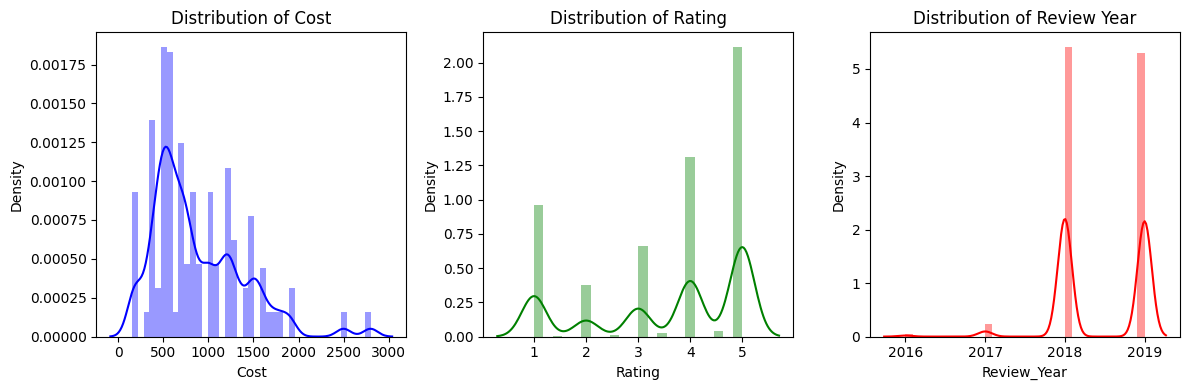

In [ ]:
import warnings
import seaborn as sns
import matplotlib.pyplot as plt

warnings.filterwarnings("ignore")

# Plotting the distribution of 'Cost'
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
sns.distplot(merged['Cost'], color='blue')
plt.title('Distribution of Cost')

# Plotting the distribution of 'Rating'
plt.subplot(1, 3, 2)
sns.distplot(merged['Rating'], color='green')
plt.title('Distribution of Rating')

# Plotting the distribution of 'Review_Year'
plt.subplot(1, 3, 3)
sns.distplot(merged['Review_Year'], color='red')
plt.title('Distribution of Review Year')

plt.tight_layout()
plt.show()

2.1 plotting highest 10 restaurants based on rating

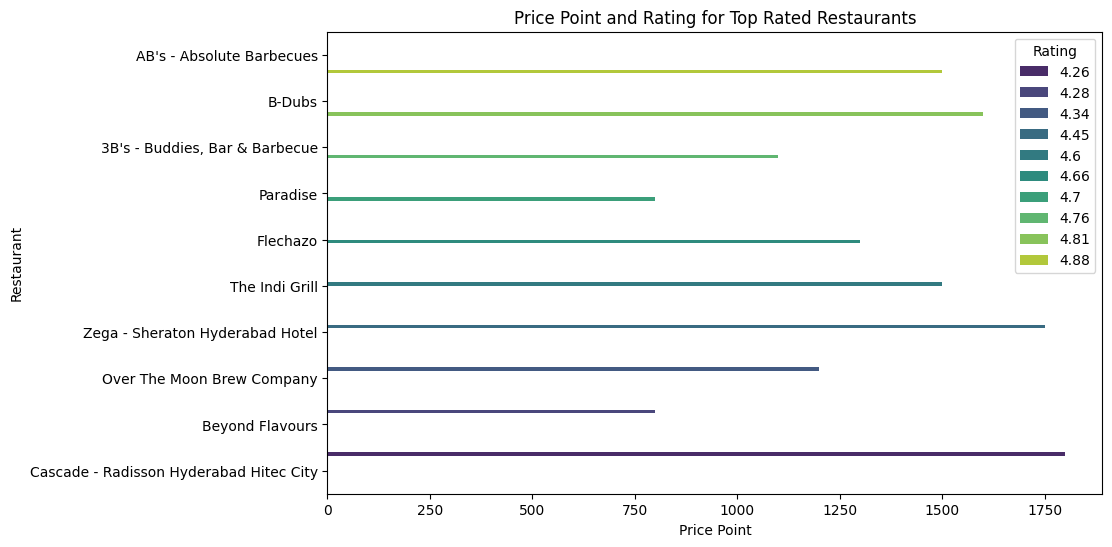

In [ ]:
# Your existing code to calculate 'Price_Point' and sort by 'Rating'
price_point = merged.groupby('Restaurant').agg({'Rating': 'mean', 'Cost': 'mean'}).reset_index()
most_engaged_hotel = price_point.sort_values('Rating', ascending=False)

# Create a bar plot showing 'Price_Point' and 'Rating'
plt.figure(figsize=(10, 6))
sns.barplot(data=most_engaged_hotel[:10], x='Cost', y='Restaurant', hue='Rating', palette='viridis')
plt.title('Price Point and Rating for Top Rated Restaurants')
plt.xlabel('Price Point')
plt.ylabel('Restaurant')
plt.legend(title='Rating')
plt.show()

2.2plotting lowest 10 restaurants based on ratinng

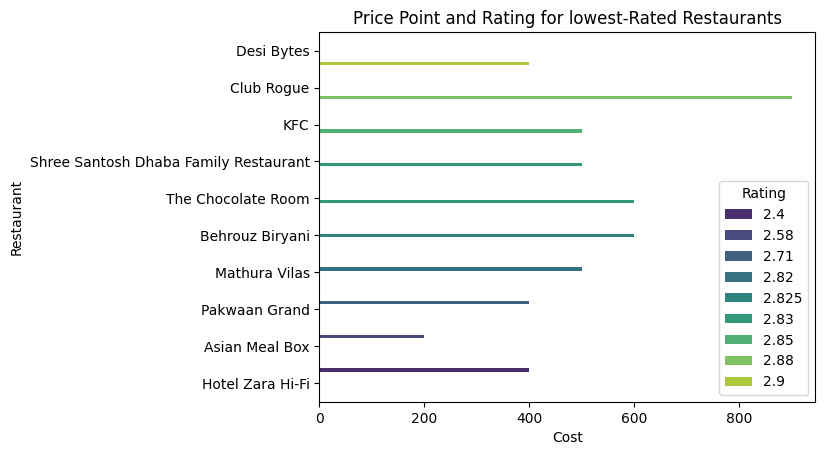

In [ ]:
#chart for less liked hotels
sns.barplot(data = most_engaged_hotel[-10:], x = 'Cost', y = 'Restaurant',  hue='Rating', palette='viridis')
plt.title('Price Point and Rating for lowest-Rated Restaurants')
plt.show()

3.plot reviewer's who given maximum reviews

In [ ]:
merged_by_reviwer = merged.groupby('Reviewer').agg({'Reviewer_Total_Review':'max',
      'Reviewer_Followers':'max', 'Rating':'mean'}).reset_index()

In [ ]:
most_reviwers=merged_by_reviwer.sort_values('Reviewer_Total_Review', ascending = False)

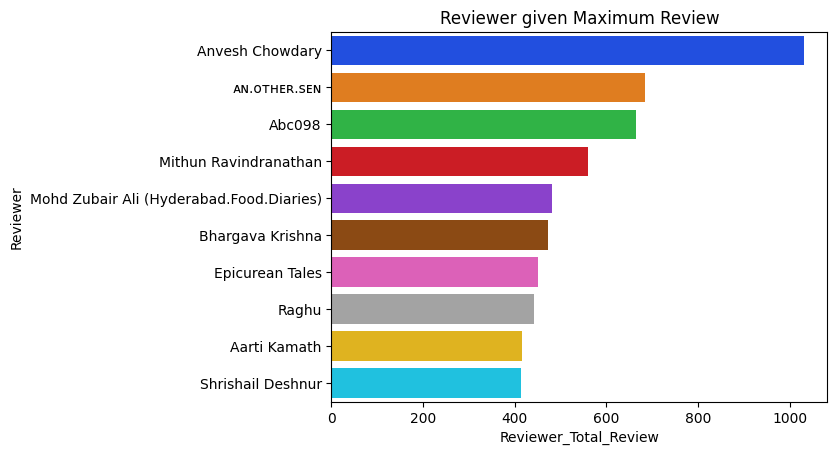

In [ ]:
# Chart - 6 visualization code for most review
sns.barplot(data = most_reviwers[:10], x = 'Reviewer_Total_Review',
            y = 'Reviewer', palette='bright')
plt.title('Reviewer given Maximum Review')
plt.show()

4.plot reviewer's who having more followers

In [ ]:
most_followed=merged_by_reviwer.sort_values('Reviewer_Followers', ascending = False)

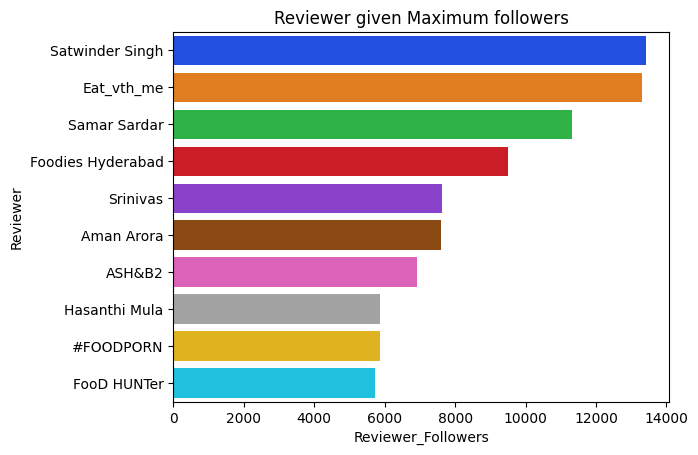

In [ ]:
# Chart - 6 visualization code for most followers
sns.barplot(data = most_followed[:10], x = 'Reviewer_Followers',
            y = 'Reviewer', palette='bright')
plt.title('Reviewer given Maximum followers')
plt.show()

5.top 5 most selling cuisines

In [ ]:
cuisine_list = cuisine_df.sort_values('Number of Restaurants', ascending = False)['Cuisine'].tolist()[:5]

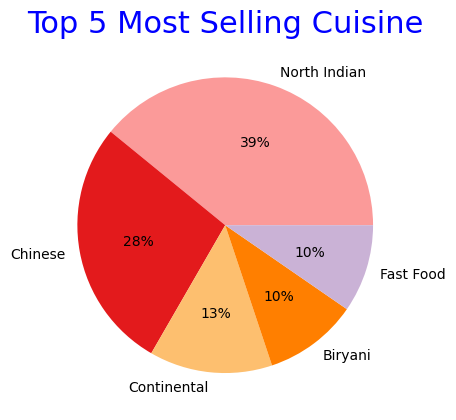

In [ ]:
# Chart - 4 visualization code pie chart for top 5 mpst selling cuisine
data = cuisine_df.sort_values('Number of Restaurants', ascending = False)[
    'Number of Restaurants'].tolist()[:5]
labels = cuisine_list

#define Seaborn color palette to use
colors = sns.color_palette('Paired')[4:9]

#create pie chart
plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')
plt.title('Top 5 Most Selling Cuisine', size =22, color= 'blue')
plt.show()

6.Top 5 Collections

In [ ]:
# spliting the cusines and storing in list
Collections_value_list = restaurants.Collections.dropna().str.split(', ')

# storing all the cusines in a dict
Collections_dict = {}
for collection in Collections_value_list:
    for col_name in collection:
        if (col_name in Collections_dict):
            Collections_dict[col_name]+=1
        else:
            Collections_dict[col_name]=1

In [ ]:
# converting the dict to a data frame
Collections_df=pd.DataFrame.from_dict([Collections_dict]).transpose().reset_index().rename(
    columns={'index':'Tags',0:'Number of Restaurants'})


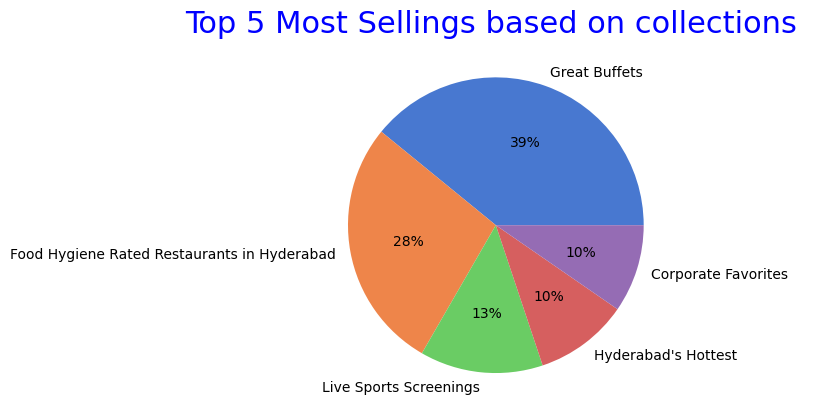

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

Collections_df.sort_values('Number of Restaurants', ascending =False)[:5]

collection_list = Collections_df.sort_values('Number of Restaurants',ascending = False)['Tags'].tolist()[:5]
# Chart - 5 visualization code pie chart for top 5 most selling cuisine
data = cuisine_df.sort_values('Number of Restaurants', ascending = False)['Number of Restaurants'].tolist()[:5]
labels = collection_list

#define Seaborn color palette to use
colors = sns.color_palette('muted')[:5] #Paired,deep , muted , pastel , bright , dark , and colorblind

#create pie chart
plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')
plt.title('Top 5 Most Sellings based on collections ', size =22, color= 'blue')
plt.show()

7.Ploting restaurants with highest and lowest prices

In [ ]:
#extracting name and price
price_of_hotel = hotel.sort_values('Cost', ascending = False)[['Restaurant','Cost']]

7.1 Top 10 Highest restaurants based on price

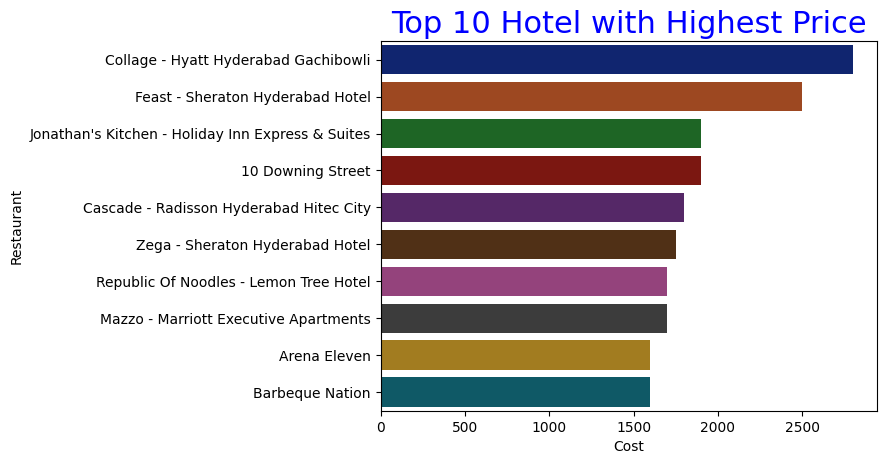

In [ ]:
# 7 visualization code for top 10 restaurants with maximum price
sns.barplot(data = price_of_hotel[:10], x = "Cost", y='Restaurant', palette = 'dark')
plt.title('Top 10 Hotel with Highest Price',size=22,color="blue")
plt.show()

7.2 Top 10 Lowest restaurants based on price

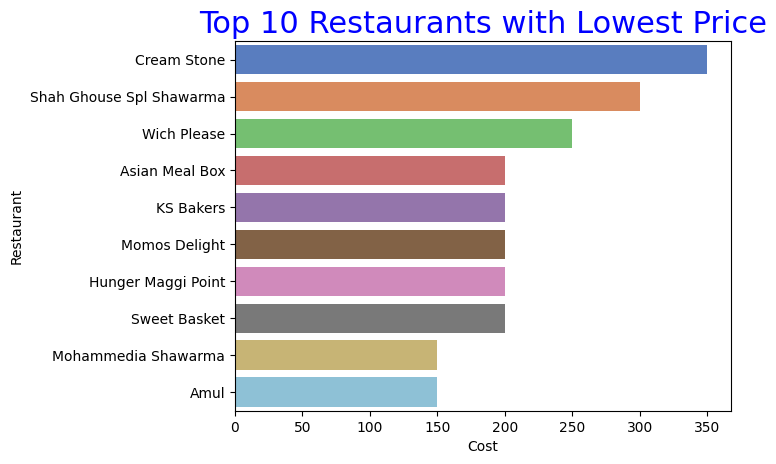

In [ ]:
#hotel with lowest price
sns.barplot(data = price_of_hotel[-10:], x = "Cost", y='Restaurant', palette = 'muted')
plt.title('Top 10 Restaurants with Lowest Price', size =22, color = 'blue')
plt.show()

8.Scatter plot for restaurants based on cost and ratings

In [ ]:
#changing data type for each rating since had value as interger surrounded by inverted comma
#since there is one rating as like converting it to 0 since no rating is 0 then to median
review.loc[review['Rating'] == 'Like'] = 0
#changing data type for rating in review data
review['Rating'] = review['Rating'].astype('float')

In [ ]:
#since there is one rating as like converting it to median
review.loc[review['Rating'] == 0] = review.Rating.median()

In [ ]:
#Average engagement of restaurants
avg_hotel_rating = review.groupby('Restaurant').agg({'Rating':'mean',
        'Reviewer': 'count'}).reset_index().rename(columns = {'Reviewer': 'Total_Review'})
avg_hotel_rating


,Restaurant,Rating,Total_Review
0,4.0,4.00,1
1,10 Downing Street,3.80,100
2,13 Dhaba,3.48,100
3,"3B's - Buddies, Bar & Barbecue",4.76,100
4,AB's - Absolute Barbecues,4.88,100
...,...,...,...
96,Urban Asia - Kitchen & Bar,3.65,100
97,Yum Yum Tree - The Arabian Food Court,3.56,100
98,Zega - Sheraton Hyderabad Hotel,4.45,100
99,Zing's Northeast Kitchen,3.65,100


In [ ]:
import pandas as pd
df=pd.DataFrame(restaurants)
df.rename(columns={'Name':'Restaurant'},inplace=True)

#merging average rating and cost to find rating for expensive hotel
Total_cost= avg_hotel_rating.merge(restaurants[['Restaurant','Cost']], on = 'Restaurant')


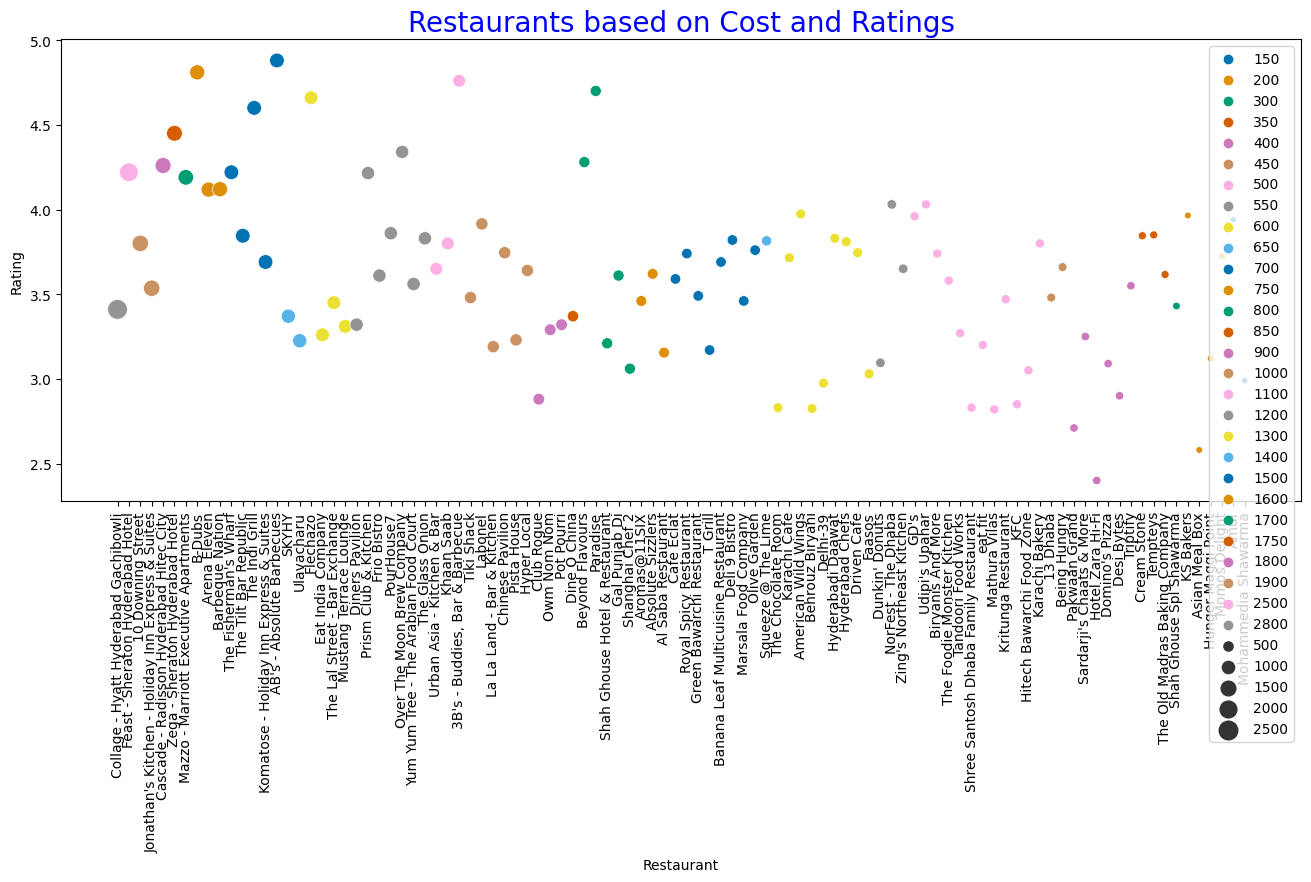

In [ ]:
#chart for rating based on price and hotel
plt.figure(figsize=(16,6))
data = Total_cost.sort_values('Cost', ascending  = False)
sns.scatterplot(data= data, x= "Restaurant", y="Rating", size="Cost",
                hue = 'Cost',legend=True, sizes=(20, 200),palette ="colorblind")
plt.xticks(rotation=90)
plt.title('Restaurants based on Cost and Ratings',size=20,color = 'blue')
plt.legend()
plt.show()

9.Corelation Heatmap with merged data

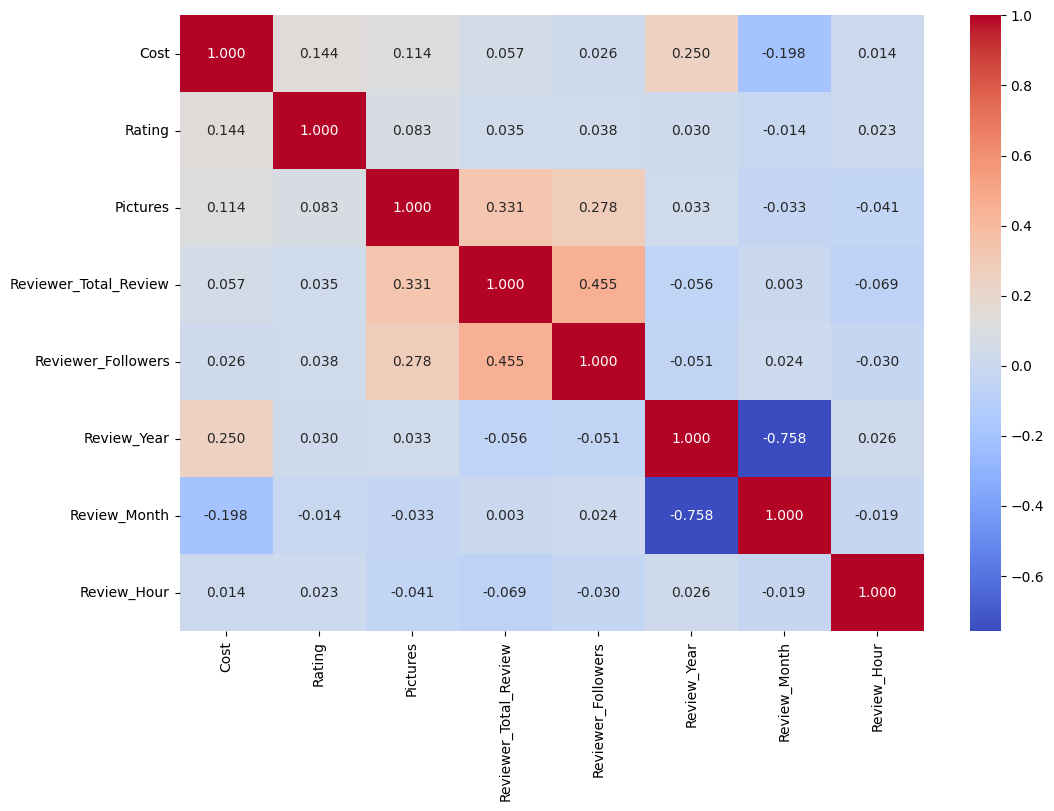

In [ ]:
correlation_matrix = merged.corr()
# Correlation Heatmap visualization code
# checking heatmap/correlation matrix to see the how the colums are correlated with each other
plt.figure(figsize=(12, 8))
# Create a heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".3f")#crest,"magma","viridis","rocket_r""cubehelix"

plt.show()

10.Pair Plot for Merged data

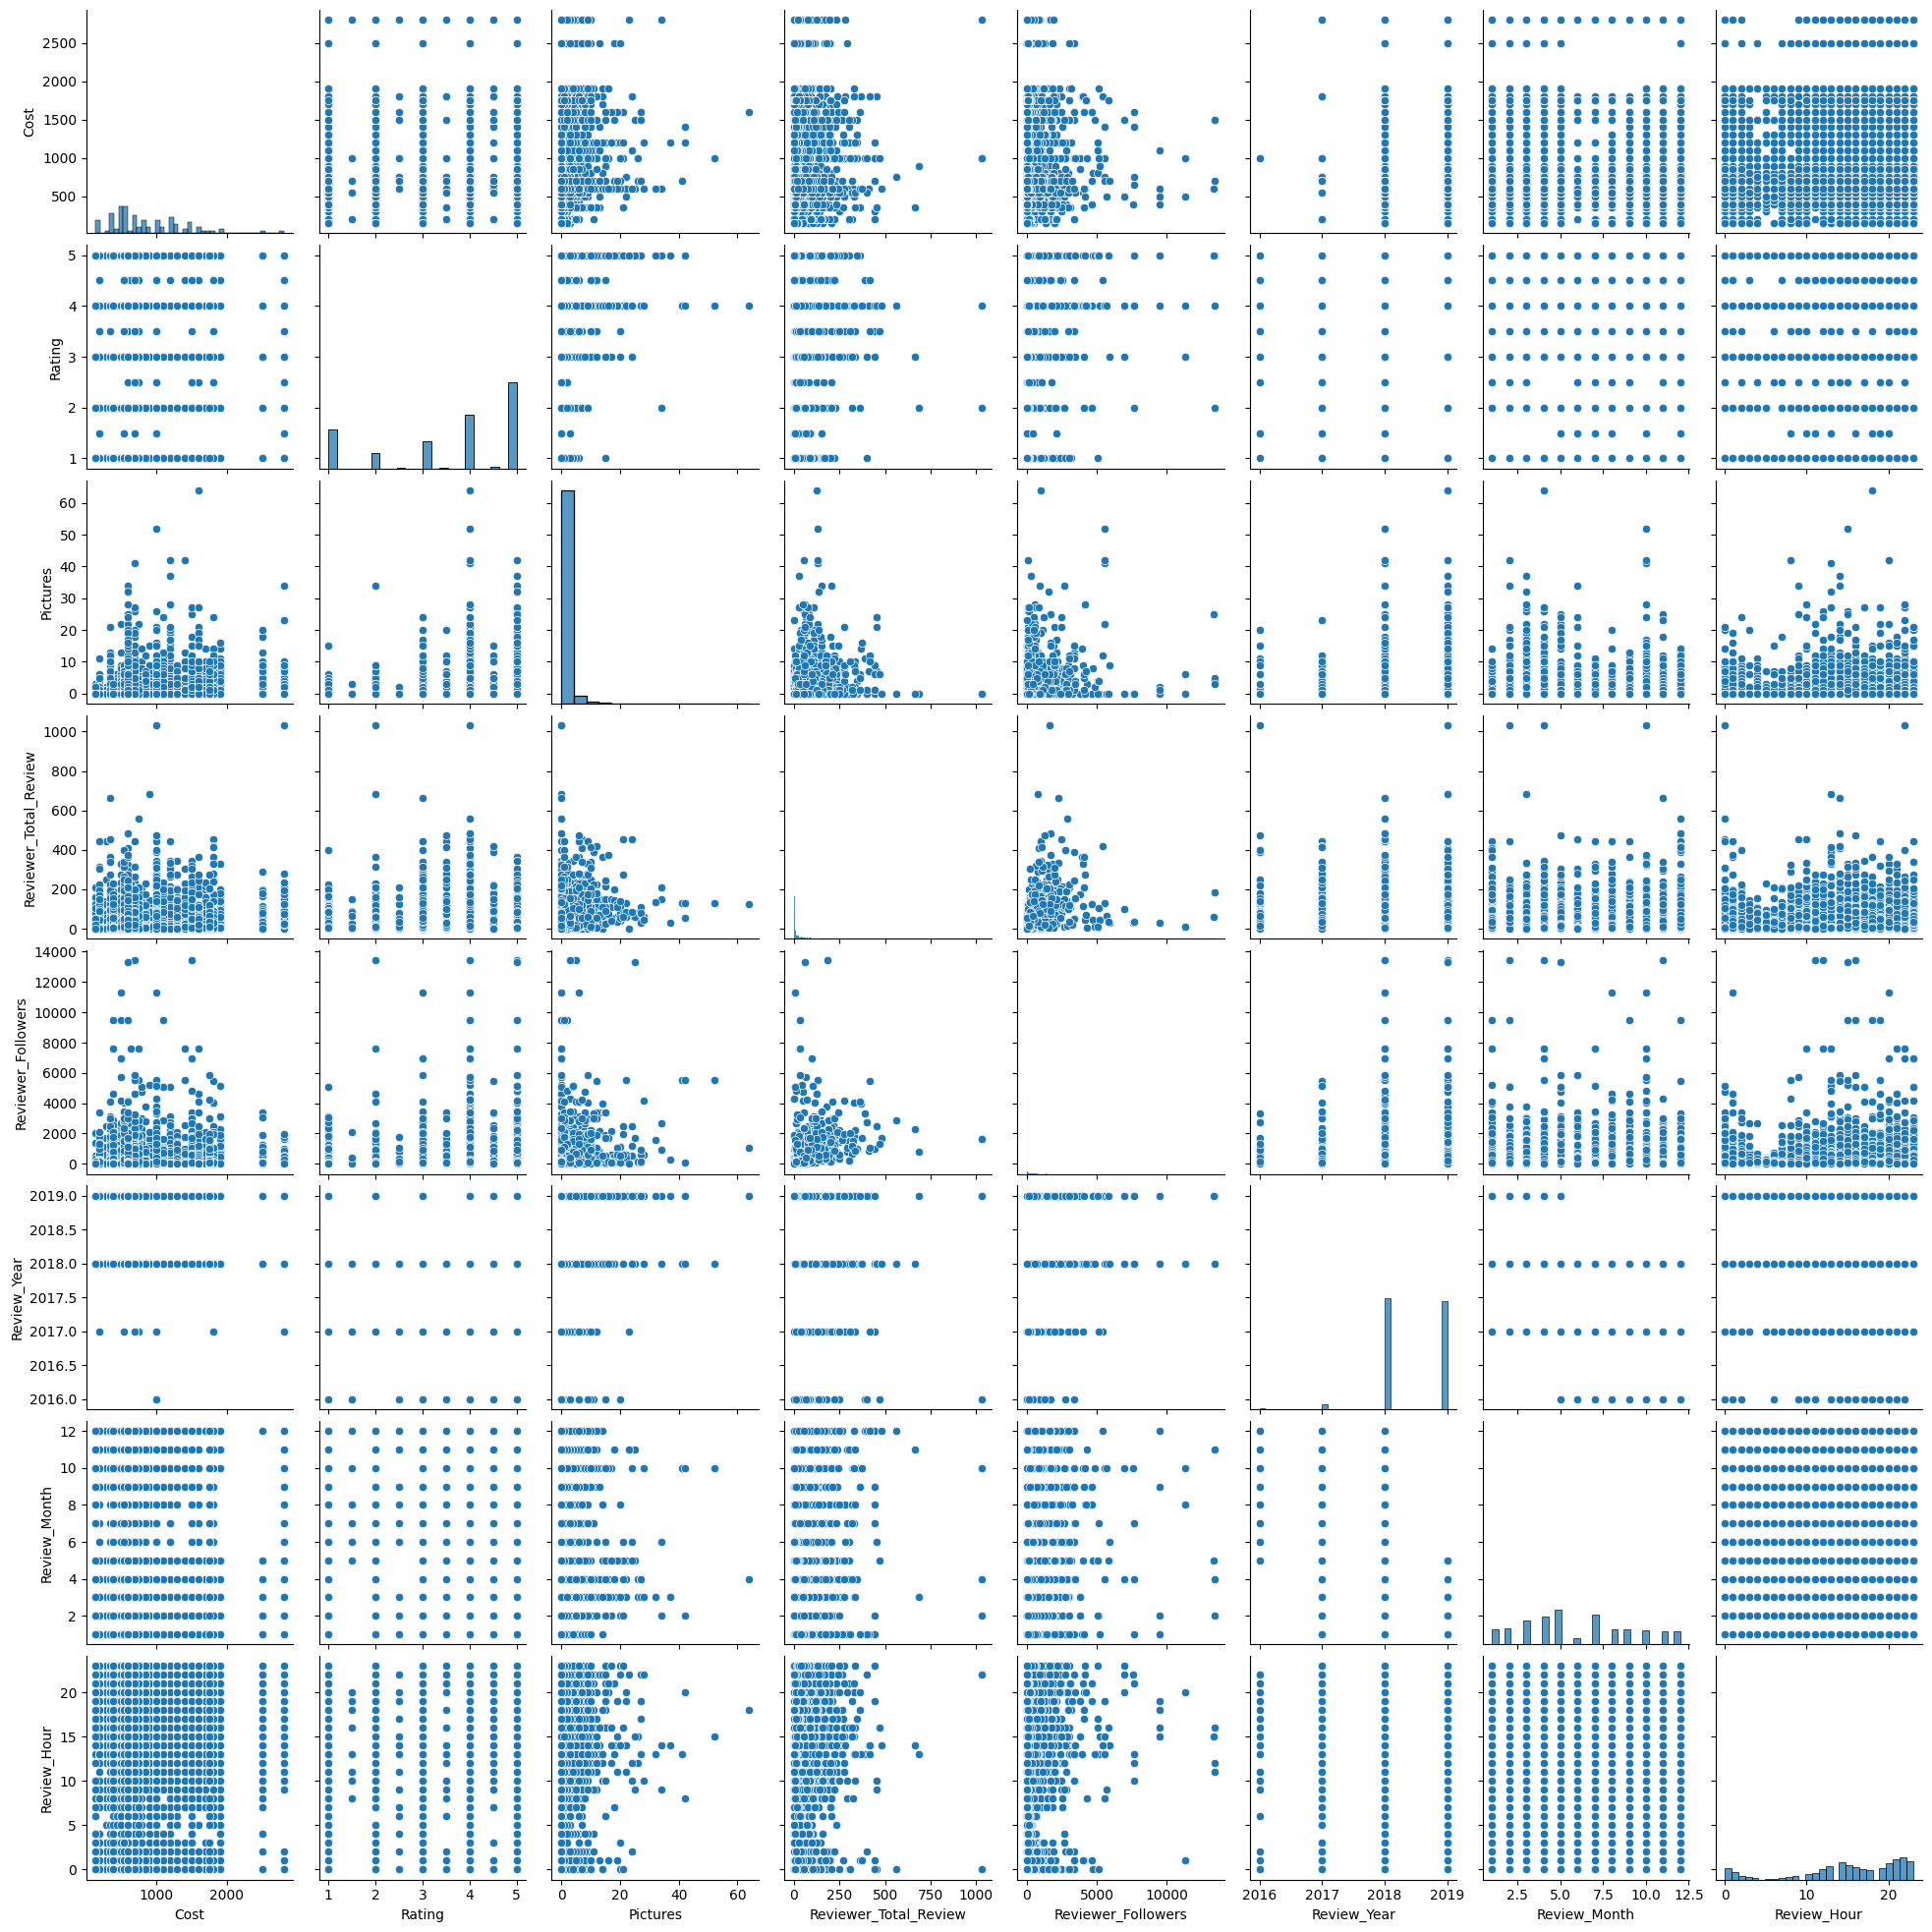

In [ ]:
# Pair Plot visualization code
sns.pairplot(merged);

# **Data Preprocessing and Feature Engineering**

## **Handling missing, outliers, categorical encoding, remove useless column**

**1. Handling Missing Values**


In [ ]:
restaurants.duplicated().value_counts()

False    105
dtype: int64

In [ ]:
review.duplicated().value_counts()

False    9964
True       36
dtype: int64

In [ ]:
#deleting duplicate value from review dataset
review = review.drop_duplicates()

In [ ]:
# Handling Missing Values & Missing Value Imputation
restaurants.isnull().sum()

Restaurant      0
Links           0
Cost            0
Collections    54
Cuisines        0
Timings         1
dtype: int64

In [ ]:
#checking the null value in timing
restaurants[restaurants['Timings'].isnull()]

,Restaurant,Links,Cost,Collections,Cuisines,Timings
30,Pot Pourri,https://www.zomato.com/hyderabad/pot-pourri-ga...,900,NaN,"Andhra, South Indian, North Indian",NaN


In [ ]:
#filling null value in timings column
restaurants.Timings.fillna(restaurants.Timings.mode()[0], inplace = True)

In [ ]:
restaurants[restaurants['Timings'].isnull()].sum()

Restaurant     0.0
Links          0.0
Cost           0.0
Collections    0.0
Cuisines       0.0
Timings        0.0
dtype: float64

In [ ]:
#checking null values in Collections

missing_percentage = ((restaurants['Collections'].isnull().sum())/(len(restaurants['Collections'])))*100
print(f'Percentage of missing value in Collections is {round(missing_percentage, 2)}%')

Percentage of missing value in Collections is 51.43%


In [ ]:
#dropping collection column since has more than 50% of null values
restaurants.drop('Collections', axis = 1, inplace = True)

In [ ]:
#final checking of missing value
restaurants.isnull().sum()

Restaurant    0
Links         0
Cost          0
Cuisines      0
Timings       0
dtype: int64

In [ ]:
#review missing value
review.isnull().sum()


Restaurant                  0
Reviewer                    2
Review                      9
Rating                      2
Metadata                    2
Time                        2
Pictures                    0
Reviewer_Total_Review       2
Reviewer_Followers       1580
Review_Year                 2
Review_Month                2
Review_Hour                 2
dtype: int64

In [ ]:
#checking null reviewer
review[review['Reviewer'].isnull()]

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures,Reviewer_Total_Review,Reviewer_Followers,Review_Year,Review_Month,Review_Hour
8777,American Wild Wings,NaN,NaN,NaN,NaN,NaT,0,NaN,NaN,NaN,NaN,NaN
9085,Arena Eleven,NaN,NaN,NaN,NaN,NaT,0,NaN,NaN,NaN,NaN,NaN


In [ ]:
#checking null Reviewer_Total_Review
review[review['Reviewer_Total_Review'].isnull()]

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures,Reviewer_Total_Review,Reviewer_Followers,Review_Year,Review_Month,Review_Hour
8777,American Wild Wings,NaN,NaN,NaN,NaN,NaT,0,NaN,NaN,NaN,NaN,NaN
9085,Arena Eleven,NaN,NaN,NaN,NaN,NaT,0,NaN,NaN,NaN,NaN,NaN


In [ ]:
# dropping null values in reviewer and Reviewer_Total_Review column as all values are null for those column
review = review.dropna(subset=['Reviewer','Reviewer_Total_Review'])

In [ ]:
#filling null values in review and reviewer follower column

review = review.fillna({"Review": "No Review", "Reviewer_Followers": 0})

In [ ]:
# final checking null values
review.isnull().sum()

Restaurant               0
Reviewer                 0
Review                   0
Rating                   0
Metadata                 0
Time                     0
Pictures                 0
Reviewer_Total_Review    0
Reviewer_Followers       0
Review_Year              0
Review_Month             0
Review_Hour              0
dtype: int64

In [ ]:
#merging both dataset

merged = restaurants.merge(review, on = 'Restaurant')
merged.columns

Index(['Restaurant', 'Links', 'Cost', 'Cuisines', 'Timings', 'Reviewer',
       'Review', 'Rating', 'Metadata', 'Time', 'Pictures',
       'Reviewer_Total_Review', 'Reviewer_Followers', 'Review_Year',
       'Review_Month', 'Review_Hour'],
      dtype='object')

**2.Handling Outliers**

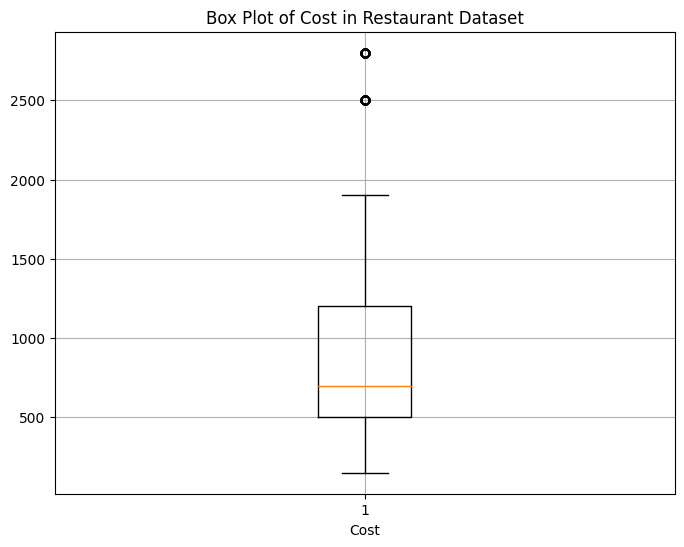

In [ ]:
# Create a box plot for the 'cost' column
plt.figure(figsize=(8, 6))
plt.boxplot(merged['Cost'], vert=True)

# Customize the plot
plt.title('Box Plot of Cost in Restaurant Dataset')
plt.xlabel('Cost')
plt.grid(True)

# Show the plot
plt.show()


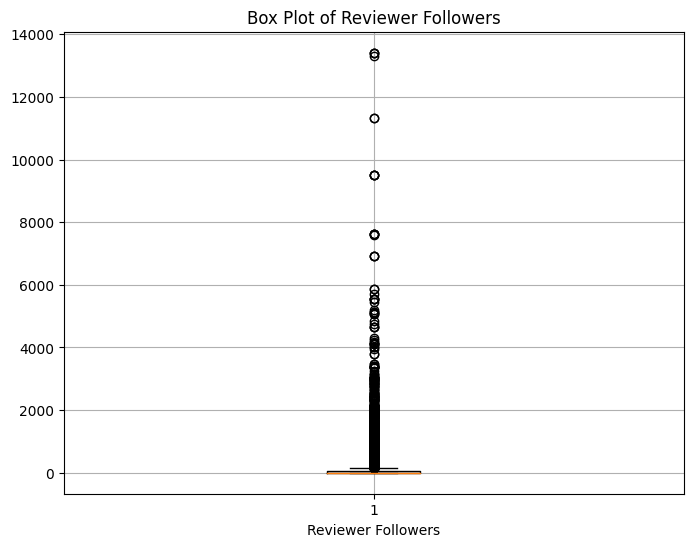

In [ ]:
# Create a box plot for the 'cost' column
plt.figure(figsize=(8, 6))
plt.boxplot(merged['Reviewer_Followers'], vert=True)

# Customize the plot
plt.title('Box Plot of Reviewer Followers')
plt.xlabel('Reviewer Followers')
plt.grid(True)

# Show the plot
plt.show()


In [ ]:
#IQR method to handle outliers

def outlier_treatment_skew(df,feature):
  IQR= df[feature].quantile(0.75)- df[feature].quantile(0.25)
  lower_bridge =df[feature].quantile(0.25)- 1.5*IQR
  upper_bridge =df[feature].quantile(0.75)+ 1.5*IQR
  # print(f'upper : {upper_bridge} lower : {lower_bridge}')
  return upper_bridge,lower_bridge

In [ ]:
# Restricting the data to lower and upper boundary for cost in hotel dataset

#lower limit capping
restaurants.loc[restaurants['Cost']<= outlier_treatment_skew(df=restaurants,
  feature='Cost')[1], 'Cost']=outlier_treatment_skew(df=restaurants,feature='Cost')[1]

#upper limit capping
restaurants.loc[restaurants['Cost']>= outlier_treatment_skew(df=restaurants,
  feature='Cost')[0], 'Cost']=outlier_treatment_skew(df=restaurants,feature='Cost')[0]

In [ ]:
# Restricting the data to lower and upper boundary for Reviewer followers in review dataset

#lower limit capping
review.loc[review['Reviewer_Followers']<= outlier_treatment_skew(df=review,
  feature='Reviewer_Followers')[1], 'Reviewer_Followers']=outlier_treatment_skew(
      df=review,feature='Reviewer_Followers')[1]

#upper limit capping
review.loc[review['Reviewer_Followers']>= outlier_treatment_skew(df=review,
  feature='Reviewer_Followers')[0], 'Reviewer_Followers']=outlier_treatment_skew(
      df=review,feature='Reviewer_Followers')[0]



In [ ]:
#Once again merge datasets and check whether they are handled or not

merged = restaurants.merge(review, on = 'Restaurant')
merged.columns

Index(['Restaurant', 'Links', 'Cost', 'Cuisines', 'Timings', 'Reviewer',
       'Review', 'Rating', 'Metadata', 'Time', 'Pictures',
       'Reviewer_Total_Review', 'Reviewer_Followers', 'Review_Year',
       'Review_Month', 'Review_Hour'],
      dtype='object')

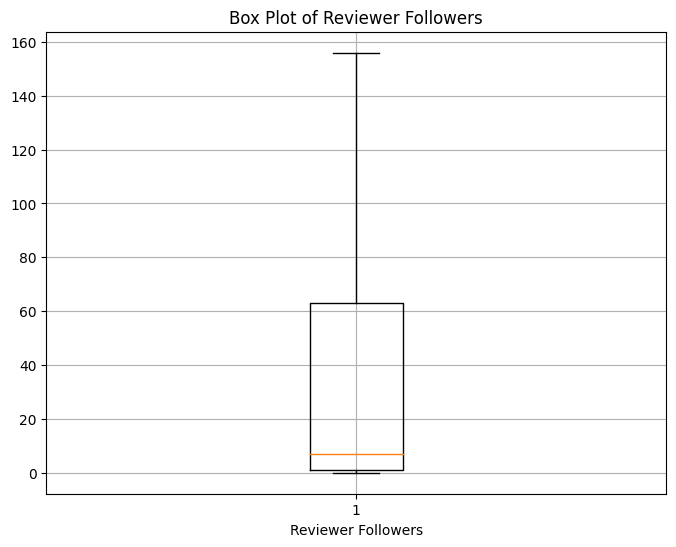

In [ ]:
# Create a box plot for the 'cost' column
plt.figure(figsize=(8, 6))
plt.boxplot(merged['Reviewer_Followers'], vert=True)

# Customize the plot
plt.title('Box Plot of Reviewer Followers')
plt.xlabel('Reviewer Followers')
plt.grid(True)

# Show the plot
plt.show()


**3.Categorical Encoding**

In [ ]:
#total cuisine count
restaurants['Total_Cuisine_Count'] = restaurants['Cuisines'].apply(lambda x : len(x.split(',')))

In [ ]:
#adding average rating - will remove 5 unrated restaurant from 105 restaurant
avg_hotel_rating.rename(columns = {'Rating':'Average_Rating'}, inplace =True)
hotel = restaurants.merge(avg_hotel_rating[['Average_Rating','Restaurant']], on = 'Restaurant')


In [ ]:
#creating data frame for categorial encoding
cluster_df = hotel[['Restaurant','Cuisines','Cost','Average_Rating','Total_Cuisine_Count']]

In [ ]:
#creating new dataframe for clustering
cluster_df = pd.concat([cluster_df,pd.DataFrame(columns=list(cuisine_dict.keys()))])

In [ ]:
#creating categorial feature for cuisine
#iterate over every row in the dataframe
for i, row in cluster_df.iterrows():
  # iterate over the new columns
  for column in list(cluster_df.columns):
      if column not in ['Restaurant','Cost','Cuisines','Average_Rating','Total_Cuisine_Count']:
        # checking if the column is in the list of cuisines available for that row
        if column in row['Cuisines']:
          #assign it as 1 else 0
          cluster_df.loc[i,column] = 1
        else:
          cluster_df.loc[i,column] = 0

In [ ]:
cluster_df.head(2).T

,0,1
Restaurant,Beyond Flavours,Paradise
Cuisines,"Chinese, Continental, Kebab, European, South I...","Biryani, North Indian, Chinese"
Cost,800.0,800.0
Average_Rating,4.28,4.7
Total_Cuisine_Count,6.0,3.0
Chinese,1,1
Continental,1,0
Kebab,1,0
European,1,0
South Indian,1,0


## **Textual Data Preprocessing**
1. Removing Punctuations

In [ ]:
#creating new df for text processing of sentiment analysis
sentiment_df = review[['Reviewer','Restaurant','Rating','Review']]
senti_df=sentiment_df.copy()
#analysing two random sample
sentiment_df.sample(2)

,Reviewer,Restaurant,Rating,Review
9485,Adarsh Doppala,Dunkin' Donuts,4.0,"Donutsssss 😉😍😘 .......coffee is ok ok, donuts ..."
3552,Bijay Puhan,Green Bawarchi Restaurant,4.0,good


In [ ]:
#setting index
sentiment_df = sentiment_df.reset_index()
sentiment_df['index'] = sentiment_df.index

In [ ]:
sentiment_df.sample(2)

,index,Reviewer,Restaurant,Rating,Review
6189,6189,Sunder Geddam,Prism Club & Kitchen,5.0,Too Good.. i was here on 2nd Feb.. #DJMERINA i...
3619,3619,Bondugula Dilip Kumar,Banana Leaf Multicuisine Restaurant,4.0,Good place to have food..We ordered Biryani an...


In [ ]:
!pip install contractions

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.8/110.8 kB 7.6 MB/s eta 0:00:00


In [ ]:
import contractions

# Define a function to fix contractions
def fix_contractions(text):
    if isinstance(text, str):
        return contractions.fix(text)
    else:
        return text  # Return the original value if it's not a string

# Apply the fix_contractions function to the 'Review' column
sentiment_df['Review'] = sentiment_df['Review'].apply(fix_contractions)


In [ ]:
sentiment_df['Review'] = sentiment_df['Review'].str.lower()

In [ ]:
sentiment_df.head()

,index,Reviewer,Restaurant,Rating,Review
0,0,Rusha Chakraborty,Beyond Flavours,5.0,"the ambience was good, food was quite good . h..."
1,1,Anusha Tirumalaneedi,Beyond Flavours,5.0,ambience is too good for a pleasant evening. s...
2,2,Ashok Shekhawat,Beyond Flavours,5.0,a must try.. great food great ambience. thnx f...
3,3,Swapnil Sarkar,Beyond Flavours,5.0,soumen das and arun was a great guy. only beca...
4,4,Dileep,Beyond Flavours,5.0,food is good.we ordered kodi drumsticks and ba...


In [ ]:
import string

# Define the function to remove punctuation
def remove_punctuation(text):
    translator = str.maketrans('', '', string.punctuation)
    return text.translate(translator)

# Assuming sentiment_df is your DataFrame
# Check for NaN values in 'Review' column and replace them with an empty string
sentiment_df['Review'] = sentiment_df['Review'].fillna('')

# Apply the remove_punctuation function
sentiment_df['Review'] = sentiment_df['Review'].apply(remove_punctuation)

# Sample the DataFrame
sentiment_df.sample(5)

,index,Reviewer,Restaurant,Rating,Review
1717,1717,Likhith Sai,Hotel Zara Hi-Fi,5.0,nice food good place for foodies and tasty is ...
4132,4132,Soumyaphogat95,Karachi Bakery,4.0,all time favorite for sweet lovers the ferrero...
3513,3513,Pramod Gatla,Green Bawarchi Restaurant,3.0,sorry for the late review ordered for mutton ...
7623,7623,Balajee Rao,The Old Madras Baking Company,4.0,spent good time with family ordered a few thin...
8089,8089,Harsh Vardhan,Tandoori Food Works,5.0,great food they listen to you as well served w...


Removing URLs & Removing words and digits contain digits

In [ ]:
import re
# Remove URLs & Remove words and digits contain digits
# Remove links
sentiment_df["Review"] = sentiment_df["Review"].apply(lambda x: re.sub(r"http\S+", "", x) if isinstance(x, str) else x)
# Remove digits
sentiment_df["Review"] = sentiment_df["Review"].apply(lambda x: re.sub(r"\d+", "", x) if isinstance(x, str) else x)

2.Removing Stopwords

In [ ]:
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')  # Download the stopwords data if you haven't already

sw = stopwords.words('english')
print(sw)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
def delete_stopwords(text):
    '''a function for removing the stop words'''
    if isinstance(text, str):
        # removing the stop words and lowercasing the selected words
        text = [word.lower() for word in text.split() if word.lower() not in sw]
        # joining the list of words with space separator
        return " ".join(text)
    else:
        return text  # Return the original value if it's not a string

# Apply the delete_stopwords function to the 'Review' column
sentiment_df['Review'] = sentiment_df['Review'].apply(delete_stopwords)


In [ ]:
# Remove White spaces and handle non-string values
sentiment_df['Review'] = sentiment_df['Review'].apply(lambda x: " ".join(x.split()) if isinstance(x, str) else x)


In [ ]:
#random sample
sentiment_df.sample(2)

,index,Reviewer,Restaurant,Rating,Review
940,940,Sowmya Valentina,Cream Stone,1.0,look quantity icecream charging product worth ...
5717,5717,Meghna Anand,Being Hungry,4.0,small outlet amazing tasty food every dish alw...


3.Tokenization

In [ ]:
import nltk

# Download the 'punkt' tokenizer data
nltk.download('punkt')

# Define a function to tokenize text and handle non-string values
def tokenize_text(text):
    if isinstance(text, str):
        return nltk.word_tokenize(text)
    else:
        return []  # Return an empty list for non-string values

# Tokenize the 'Review' column
sentiment_df['Review'] = sentiment_df['Review'].apply(tokenize_text)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
sentiment_df.sample(2)

,index,Reviewer,Restaurant,Rating,Review
749,749,Benson Benny,Shah Ghouse Spl Shawarma,4.0,"[although, shah, g, famous, late, night, dine,..."
7409,7409,Pradeepti Sharma,Faasos,5.0,"[ordered, paneer, wraps, one, cheese, tangy, m..."


4.Lemmatization

In [ ]:
import nltk

nltk.download('wordnet')


[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
from nltk.stem import WordNetLemmatizer

# Download the WordNet data
nltk.download('wordnet')

# Create a lemmatizer
lemmatizer = WordNetLemmatizer()

def lemmatize_tokens(tokens):
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]
    return lemmatized_tokens

# Lemmatize the 'Review' column
sentiment_df['Review'] = sentiment_df['Review'].apply(lemmatize_tokens)


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
sentiment_df.sample(2)

,index,Reviewer,Restaurant,Rating,Review
4227,4227,Prateek Chhipa,Karachi Cafe,4.0,"[veg, puff, number, time, karachi, cafe, never..."
9326,9326,Deepa Mallick,Zing's Northeast Kitchen,4.0,"[love, asian, food, brought, place, place, wou..."


5.Parts of Speech Tag

In [ ]:
sentiment_tfid = sentiment_df.copy()

In [ ]:
nltk.download('averaged_perceptron_tagger')


[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [ ]:
sentiment_tfid['Review'] = sentiment_tfid['Review'].apply(nltk.pos_tag)


6.Text Vecorization

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(tokenizer=lambda x: x, lowercase=False)
vectorizer.fit(sentiment_df['Review'].values)
#creating independent variable for sentiment analysis
X_tfidf = vectorizer.transform(sentiment_df['Review'].values)

In [ ]:
import gensim

# Bag of Words
tokenized_text = []
for token in sentiment_df['Review']:
    tokenized_text.append(token)

# Creating token dictionary
tokens_dict = gensim.corpora.Dictionary(tokenized_text)

# Print token dictionary
tokens_dict.token2id = list(tokens_dict.token2id.items())
tokens_dict.token2id[:10]



[('also', 0),
 ('ambience', 1),
 ('brunch', 2),
 ('chill', 3),
 ('cost', 4),
 ('courteous', 5),
 ('da', 6),
 ('effective', 7),
 ('food', 8),
 ('friend', 9)]

In [ ]:
#using tokens_dict.doc2bow() to generate BoW features for each tokenized course
texts_bow = [tokens_dict.doc2bow(text) for text in tokenized_text]

#creating a new text_bow dataframe based on the extracted BoW features
tokens = []
bow_values = []
doc_indices = []
doc_ids = []
for text_idx, text_bow in enumerate(texts_bow):
    for token_index, token_bow in text_bow:
        token = tokens_dict.get(token_index)
        tokens.append(token)
        bow_values.append(token_bow)
        doc_indices.append(text_idx)
        doc_ids.append(sentiment_df["Restaurant"][text_idx])

bow_dict = {"doc_index": doc_indices,
            "doc_id": doc_ids,
            "token": tokens,
            "bow": bow_values,
            }
bows_df = pd.DataFrame(bow_dict)
bows_df.head()

,doc_index,doc_id,token,bow


# **Clustering Restaurants**

## **1.selecting optimal clusters**

In [ ]:
cluster_df.columns

Index(['Restaurant', 'Cuisines', 'Cost', 'Average_Rating',
       'Total_Cuisine_Count', 'Chinese', 'Continental', 'Kebab', 'European',
       'South Indian', 'North Indian', 'Biryani', 'Asian', 'Mediterranean',
       'Desserts', 'Seafood', 'Beverages', 'Goan', 'Healthy Food', 'Lebanese',
       'American', 'Ice Cream', 'Street Food', 'Fast Food', 'BBQ', 'Italian',
       'Finger Food', 'Burger', 'Japanese', 'Salad', 'Sushi', 'Mexican',
       'Mughlai', 'Andhra', 'Bakery', 'Juices', 'Arabian', 'Hyderabadi',
       'Cafe', 'Spanish', 'Wraps', 'Thai', 'Indonesian', 'Modern Indian',
       'Momos', 'Pizza', 'North Eastern', 'Mithai', 'Malaysian'],
      dtype='object')

In [ ]:
#normalizing numerical columns
from sklearn.preprocessing import StandardScaler
numerical_cols = ['Cost','Total_Cuisine_Count','Average_Rating']
scaler = StandardScaler()
scaled_df = cluster_df.copy()
scaled_df[numerical_cols] = scaler.fit_transform(cluster_df[numerical_cols])

In [ ]:
# Dimensionality Reduction (If needed)
#applying pca
#setting restaurant feature as index as it still had categorial value
from sklearn.decomposition import PCA
scaled_df.set_index(['Restaurant'],inplace=True)
features = scaled_df.columns
features = features.drop('Cuisines')


In [ ]:
#using n_component as 3
pca = PCA(n_components=3)

# transform data to principal component space
df_pca = pca.fit_transform(scaled_df[features])

In [ ]:
# ML Model - 1 Implementation
#importing kmeans
from sklearn.cluster import KMeans

In [ ]:
#Within Cluster Sum of Squared Errors(WCSS) for different values of k
wcss=[]
for i in range(1,11):
    km=KMeans(n_clusters=i,random_state = 20)
    km.fit(df_pca)
    wcss.append(km.inertia_)

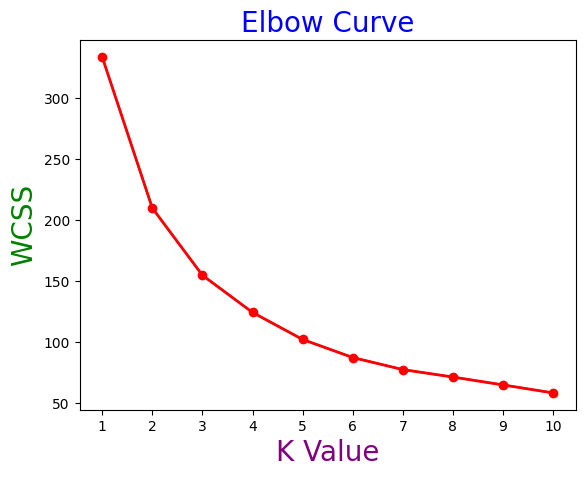

In [ ]:
#elbow curve
plt.plot(range(1,11),wcss)
plt.plot(range(1,11),wcss, linewidth=2, color="red", marker ="o")
plt.xlabel("K Value", size = 20, color = 'purple')
plt.xticks(np.arange(1,11,1))
plt.ylabel("WCSS", size = 20, color = 'green')
plt.title('Elbow Curve', size = 20, color = 'blue')
plt.show()

In [ ]:
km = KMeans(n_clusters=5, n_init=1000, max_iter=650, random_state=1)
predicted_clusters = km.fit_predict(df_pca)
predicted_clusters

array([4, 3, 3, 0, 4, 4, 0, 2, 0, 2, 1, 4, 2, 0, 3, 1, 2, 1, 4, 1, 2, 4,
       3, 2, 0, 2, 0, 3, 1, 1, 0, 0, 0, 1, 4, 0, 0, 0, 4, 2, 4, 2, 2, 2,
       0, 0, 0, 0, 2, 1, 2, 1, 2, 0, 1, 2, 4, 2, 2, 2, 4, 4, 1, 0, 2, 4,
       0, 2, 4, 3, 0, 0, 2, 2, 1, 2, 2, 0, 2, 0, 1, 1, 0, 2, 0, 2, 1, 2,
       1, 1, 3, 4, 4, 2, 0, 1, 2, 3, 2, 2], dtype=int32)

In [ ]:
np.unique(km.labels_,return_counts=True,return_index=True)

(array([0, 1, 2, 3, 4], dtype=int32),
 array([ 3, 10,  7,  1,  0]),
 array([26, 18, 32,  8, 16]))

In [ ]:
df_cluster=cluster_df.copy()
df_cluster.head(1)

,Restaurant,Cuisines,Cost,Average_Rating,Total_Cuisine_Count,Chinese,Continental,Kebab,European,South Indian,...,Spanish,Wraps,Thai,Indonesian,Modern Indian,Momos,Pizza,North Eastern,Mithai,Malaysian
0,Beyond Flavours,"Chinese, Continental, Kebab, European, South I...",800.0,4.28,6.0,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df_cluster['clusters']=predicted_clusters
df_clustered_0=df_cluster[df_cluster['clusters']==0]
df_clustered_1=df_cluster[df_cluster['clusters']==1]
df_clustered_2=df_cluster[df_cluster['clusters']==2]
df_clustered_3=df_cluster[df_cluster['clusters']==3]
df_clustered_4=df_cluster[df_cluster['clusters']==4]

df_clustered_0['Restaurant']

3          Shah Ghouse Hotel & Restaurant
6                                 eat.fit
8                             Hyper Local
13          The Lal Street - Bar Exchange
24                                  SKYHY
26                 Mustang Terrace Lounge
30                             Pot Pourri
31                            Pista House
32                   Marsala Food Company
35              Green Bawarchi Restaurant
36    Banana Leaf Multicuisine Restaurant
37                    Kritunga Restaurant
44             La La Land - Bar & Kitchen
45                            Owm Nom Nom
46                             Ulavacharu
47                        Shanghai Chef 2
53                        Diners Pavilion
63                           Dine O China
66                           Aromas@11SIX
70             Urban Asia - Kitchen & Bar
71                      Eat India Company
77                     Squeeze @ The Lime
79                           Olive Garden
82                     Al Saba Res

In [ ]:
df_clustered_1['Restaurant']

10                 Sardarji's Chaats & More
15                                      KFC
17                         Hotel Zara Hi-Fi
19                            Pakwaan Grand
28                          Behrouz Biryani
29                       Hunger Maggi Point
33                               Club Rogue
49                            Mathura Vilas
51                Hitech Bawarchi Food Zone
54                           Asian Meal Box
62    Shree Santosh Dhaba Family Restaurant
74                                   Faasos
80                      Tandoori Food Works
81                                 Delhi-39
86                       The Chocolate Room
88                           Domino's Pizza
89                      Mohammedia Shawarma
95                               Desi Bytes
Name: Restaurant, dtype: object

In [ ]:
df_clustered_2['Restaurant']

7                  Shah Ghouse Spl Shawarma
9                               Cream Stone
12                        Absolute Sizzlers
16                      NorFest - The Dhaba
20                                 13 Dhaba
23                                     Amul
25                               Tiki Shack
39                            Deli 9 Bistro
41                           Karachi Bakery
42                             Karachi Cafe
43               The Foodie Monster Kitchen
48                           Udipi's Upahar
50                            Gal Punjab Di
52                        Biryanis And More
55                               Cafe Eclat
57                             Being Hungry
58                                 Tempteys
59                                KS Bakers
64                          Hyderabad Chefs
67    Yum Yum Tree - The Arabian Food Court
72                                  Labonel
73                              Driven Cafe
75                   Royal Spicy

In [ ]:
df_clustered_3['Restaurant']

1                            Paradise
2                            Flechazo
14          AB's - Absolute Barbecues
22                             B-Dubs
27     3B's - Buddies, Bar & Barbecue
69                     The Indi Grill
90                       Arena Eleven
97    Zega - Sheraton Hyderabad Hotel
Name: Restaurant, dtype: object

In [ ]:
df_clustered_4['Restaurant']

0                                       Beyond Flavours
4                            Over The Moon Brew Company
5                                 The Fisherman's Wharf
11                                      Barbeque Nation
18                                    10 Downing Street
21    Jonathan's Kitchen - Holiday Inn Express & Suites
34                Mazzo - Marriott Executive Apartments
38                                      The Glass Onion
40                                          Frio Bistro
56                     Feast - Sheraton Hyderabad Hotel
60                                           PourHouse7
61                                 Prism Club & Kitchen
65              Komatose - Holiday Inn Express & Suites
68                                The Tilt Bar Republic
91              Cascade - Radisson Hyderabad Hitec City
92                 Collage - Hyatt Hyderabad Gachibowli
Name: Restaurant, dtype: object

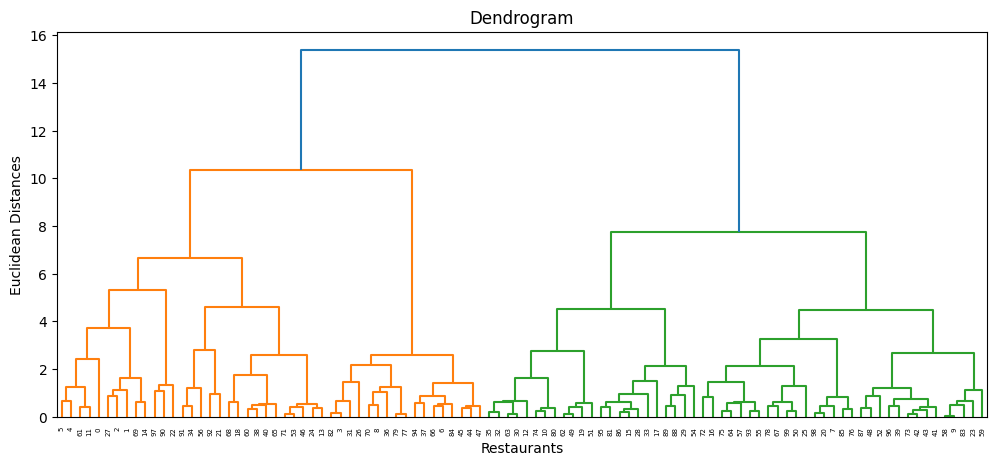

In [ ]:
#importing module for hierarchial clustering and vizualizing dendograms
import scipy.cluster.hierarchy as sch
plt.figure(figsize=(12,5))
dendrogram = sch.dendrogram(sch.linkage(df_pca, method = 'ward'),orientation='top',
            distance_sort='descending',
            show_leaf_counts=True)

plt.title('Dendrogram')
plt.xlabel('Restaurants')
plt.ylabel('Euclidean Distances')

plt.show()

In [ ]:
from sklearn.cluster import AgglomerativeClustering
ac = AgglomerativeClustering(n_clusters = 8, affinity = 'euclidean', linkage = 'ward')
predicted_ac = ac.fit_predict(df_pca)#fitting agglomerative clustering

predicted_ac

array([1, 1, 1, 6, 1, 1, 6, 0, 6, 0, 4, 1, 4, 2, 1, 7, 0, 7, 2, 4, 0, 3,
       5, 0, 2, 0, 6, 1, 7, 7, 4, 6, 4, 7, 3, 4, 6, 6, 2, 0, 2, 0, 0, 0,
       6, 6, 2, 6, 0, 4, 0, 4, 0, 2, 7, 0, 3, 0, 0, 0, 2, 1, 4, 4, 0, 2,
       6, 0, 2, 1, 6, 2, 0, 0, 4, 0, 0, 6, 0, 6, 4, 7, 6, 0, 6, 0, 7, 0,
       7, 7, 5, 3, 3, 0, 6, 7, 0, 5, 0, 0])

In [ ]:
np.unique(predicted_ac,return_counts=True,return_index=True)

(array([0, 1, 2, 3, 4, 5, 6, 7]),
 array([ 7,  0, 13, 21, 10, 22,  3, 15]),
 array([31, 10, 11,  5, 12,  3, 17, 11]))

In [ ]:
df_cluster['cluster_ac']=predicted_ac
df_cluster[['clusters','cluster_ac']]

,clusters,cluster_ac
0,4,1
1,3,1
2,3,1
3,0,6
4,4,1
...,...,...
95,1,7
96,2,0
97,3,5
98,2,0


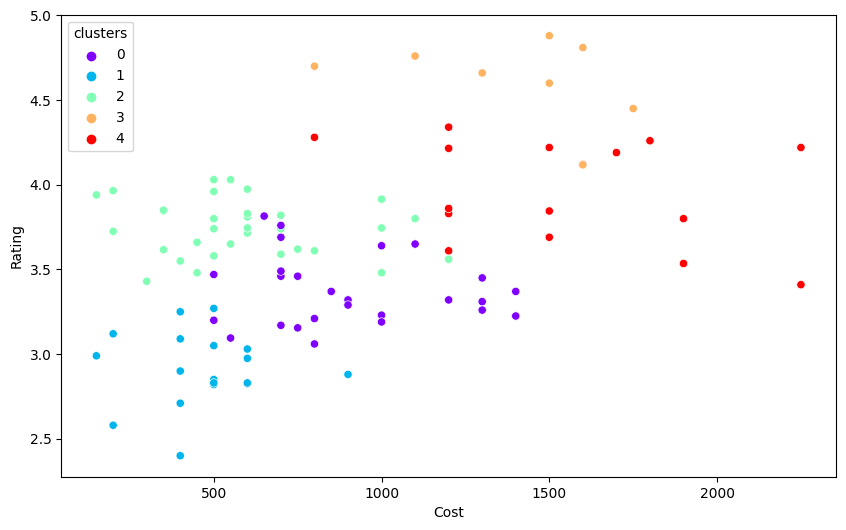

In [ ]:
# Plot the clusters

plt.figure(figsize=[10, 6])
sns.scatterplot(x = df_cluster['Cost'], y = df_cluster['Average_Rating'], hue = df_cluster['clusters'], palette='rainbow', legend = 'full')
plt.xlabel('Cost')
plt.ylabel('Rating')
plt.show()

# **Sentiment Analysis**

Sentiment Analysis based on Review

In [ ]:
import pandas as pd
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
nltk.download('vader_lexicon')

# Assuming you have a CSV file named 'restaurant_reviews.csv' with a column 'review_text'
# df = pd.read_csv('sentiment_df.csv')
# Define a function for sentiment analysis
def get_sentiment(text):
    analyzer = SentimentIntensityAnalyzer()
    sentiment_score = analyzer.polarity_scores(text)
    if sentiment_score['compound'] >= 0.01:
        return 'positive'
    elif sentiment_score['compound'] <= -0.01:
        return 'negative'
    else:
        return 'neutral'

# Convert 'Review' column to strings
senti_df['Review'] = sentiment_df['Review'].astype(str)

# Apply sentiment analysis to each review
senti_df['sentiment'] = senti_df['Review'].apply(get_sentiment)

# Save the dataset with the 'sentiment' column added
senti_df.to_csv('restaurant_reviews_with_sentiment.csv', index=False)


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [ ]:
senti_df.head()

,Reviewer,Restaurant,Rating,Review,sentiment
0,Rusha Chakraborty,Beyond Flavours,5.0,"The ambience was good, food was quite good . h...",positive
1,Anusha Tirumalaneedi,Beyond Flavours,5.0,Ambience is too good for a pleasant evening. S...,positive
2,Ashok Shekhawat,Beyond Flavours,5.0,A must try.. great food great ambience. Thnx f...,positive
3,Swapnil Sarkar,Beyond Flavours,5.0,Soumen das and Arun was a great guy. Only beca...,positive
4,Dileep,Beyond Flavours,5.0,Food is good.we ordered Kodi drumsticks and ba...,positive


In [ ]:
senti_df['sentiment'].unique()

array(['positive', 'negative', 'neutral'], dtype=object)

In [ ]:
senti_df.shape

(9962, 5)

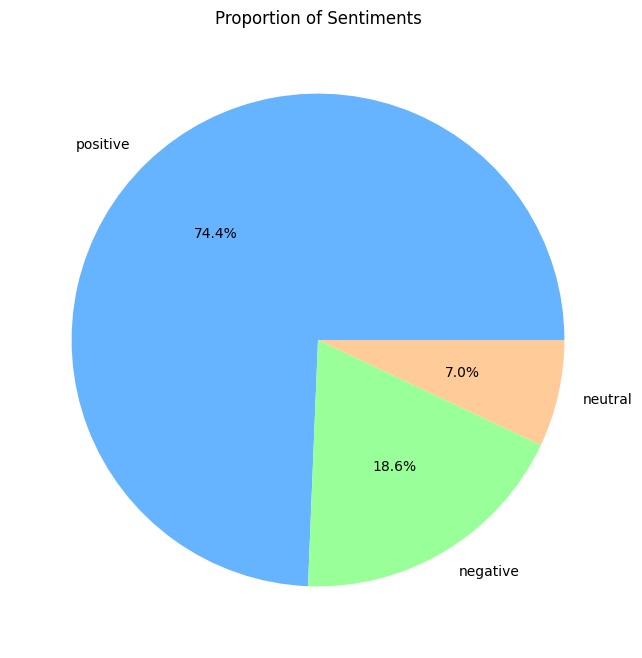

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 8))
sentiment_counts = senti_df['sentiment'].value_counts()
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', colors=['#66b3ff','#99ff99','#ffcc99'])
plt.title('Proportion of Sentiments')
plt.show()


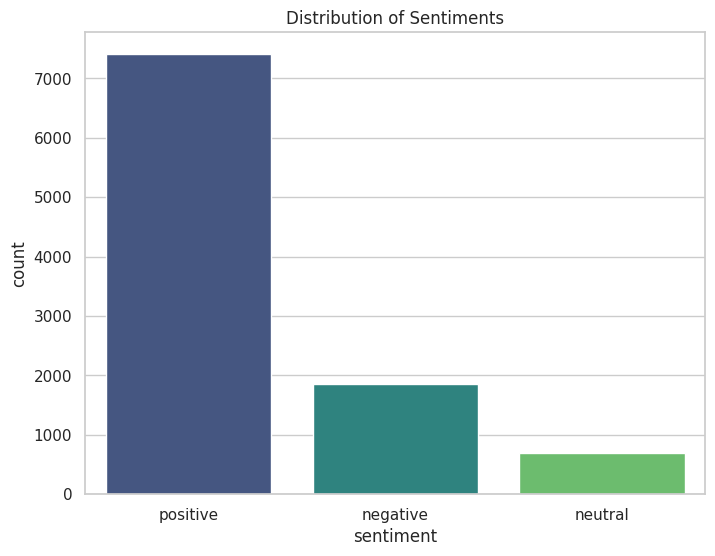

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
sns.countplot(x='sentiment', data=senti_df, palette='viridis')
plt.title('Distribution of Sentiments')
plt.show()


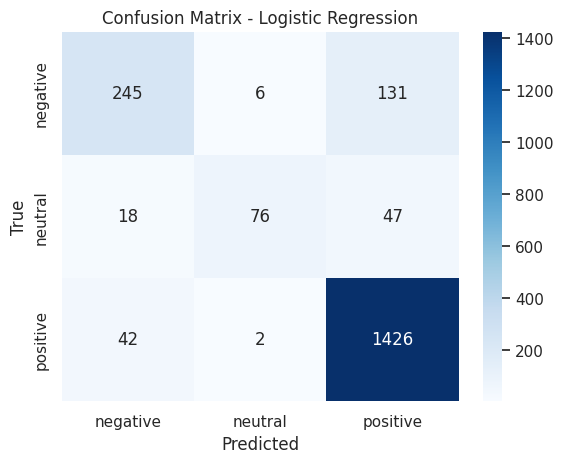

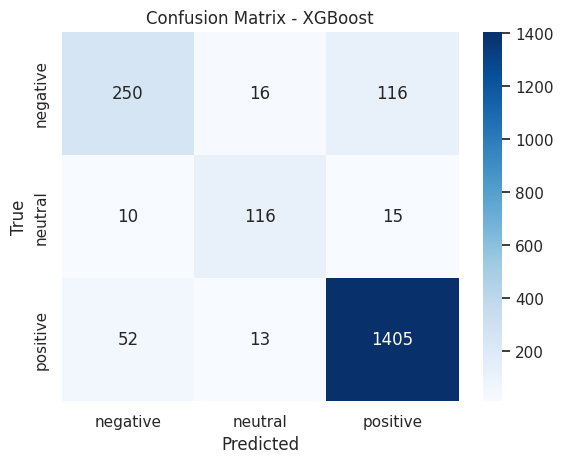

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Use label encoding to convert string labels to numeric values
label_encoder = LabelEncoder()
senti_df['sentiment_numeric'] = label_encoder.fit_transform(senti_df['sentiment'])

# Split the data into features (X) and target (y)
X = senti_df['Review']
y = senti_df['sentiment_numeric']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# TF-IDF Vectorization
vectorizer = TfidfVectorizer(max_features=5000, stop_words='english')
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Logistic Regression Model
logreg_model = LogisticRegression()
logreg_model.fit(X_train_tfidf, y_train)

# XGBoost Model
xgb_model = XGBClassifier()
xgb_model.fit(X_train_tfidf, y_train)

# Function to plot confusion matrix
def plot_conf_matrix(model, X, y, label):
    y_pred = model.predict(X)
    cm = confusion_matrix(y, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
    plt.title(f'Confusion Matrix - {label}')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

# Plot confusion matrices for Logistic Regression and XGBoost
plot_conf_matrix(logreg_model, X_test_tfidf, y_test, 'Logistic Regression')
plot_conf_matrix(xgb_model, X_test_tfidf, y_test, 'XGBoost')


In [ ]:
!pip install -U scikit-learn


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 34.6 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2


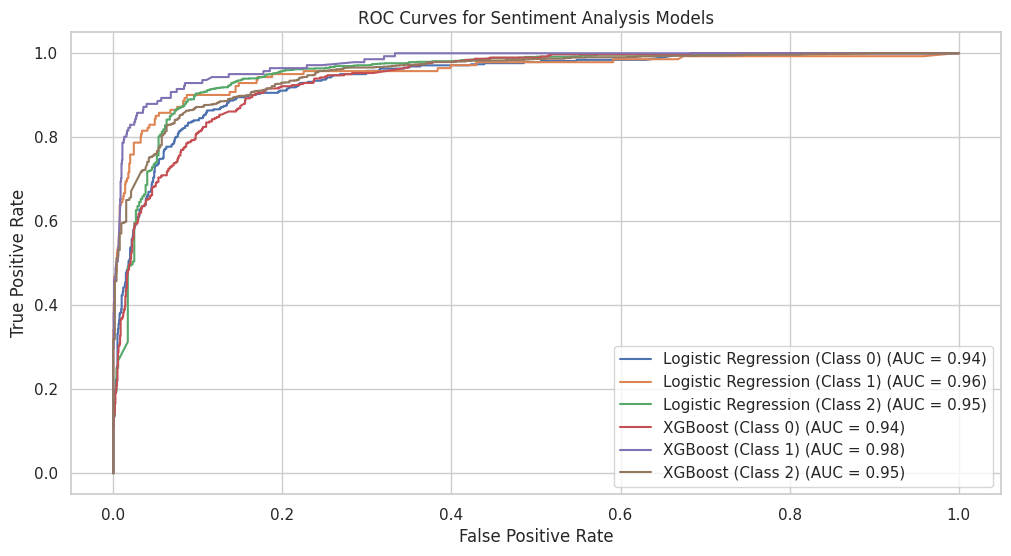

In [ ]:

from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Function to plot ROC curve for each class
def plot_roc_curve(model, X, y, label):
    y_prob = model.predict_proba(X)

    # Binarize the labels
    y_bin = label_binarize(y, classes=model.classes_)

    # Compute ROC curve and ROC area for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(len(model.classes_)):
        fpr[i], tpr[i], _ = roc_curve(y_bin[:, i], y_prob[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

        # Plot ROC curve for each class
        plt.plot(fpr[i], tpr[i], label=f'{label} (Class {model.classes_[i]}) (AUC = {roc_auc[i]:.2f})')

# Plot ROC curves for Logistic Regression and XGBoost for each class
plt.figure(figsize=(12, 6))

# Logistic Regression
plot_roc_curve(logreg_model, X_test_tfidf, y_test, 'Logistic Regression')

# XGBoost
plot_roc_curve(xgb_model, X_test_tfidf, y_test, 'XGBoost')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Sentiment Analysis Models')
plt.legend()
plt.show()




Sentiment Analysis based on Rating

In [ ]:
import pandas as pd
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
nltk.download('vader_lexicon')

# Define a function for sentiment analysis based on numerical ratings
def get_sentiment_from_rating(rating):
    if rating >= 4:
        return 'positive'
    elif rating <= 2:
        return 'negative'
    else:
        return 'neutral'

# Apply sentiment analysis to each rating
senti_df['sentiment'] = senti_df['Rating'].apply(get_sentiment_from_rating)


# Save the dataset with the 'sentiment' column added
senti_df.to_csv('restaurant_reviews_with_sentiment.csv', index=False)






[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


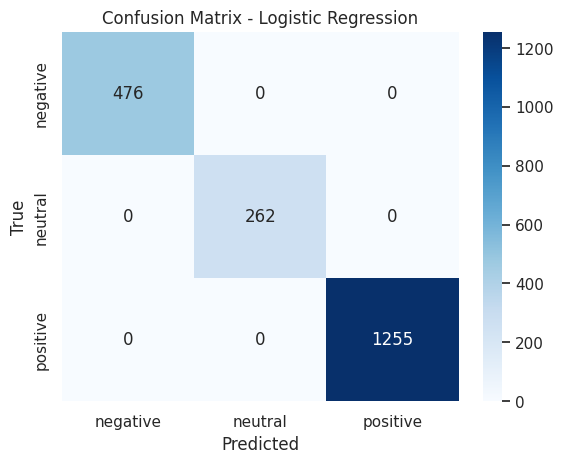

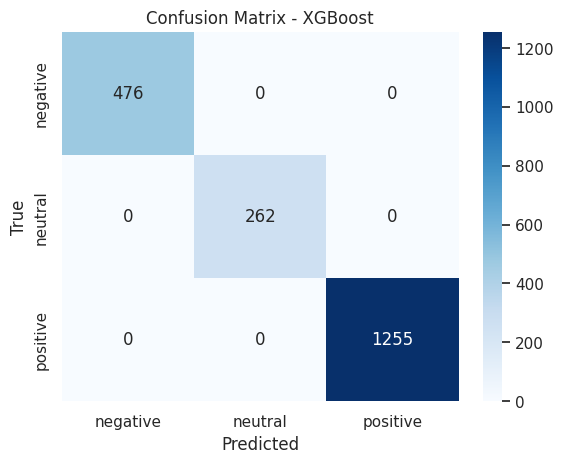

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have a CSV file named 'restaurant_reviews_with_sentiment.csv' with columns 'Rating' and 'sentiment'
senti_df = pd.read_csv('restaurant_reviews_with_sentiment.csv')

# Use label encoding to convert string labels to numeric values
label_encoder = LabelEncoder()
senti_df['sentiment_numeric'] = label_encoder.fit_transform(senti_df['sentiment'])

# Split the data into features (X) and target (y)
X = senti_df['Rating'].values.reshape(-1, 1)  # Reshape to ensure it's a 2D array
y = senti_df['sentiment_numeric']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Logistic Regression Model
logreg_model = LogisticRegression()
logreg_model.fit(X_train, y_train)

# XGBoost Model
xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)

# Function to plot confusion matrix
def plot_conf_matrix(model, X, y, label):
    y_pred = model.predict(X)
    cm = confusion_matrix(y, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
    plt.title(f'Confusion Matrix - {label}')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

# Plot confusion matrices for Logistic Regression and XGBoost
plot_conf_matrix(logreg_model, X_test, y_test, 'Logistic Regression')
plot_conf_matrix(xgb_model, X_test, y_test, 'XGBoost')


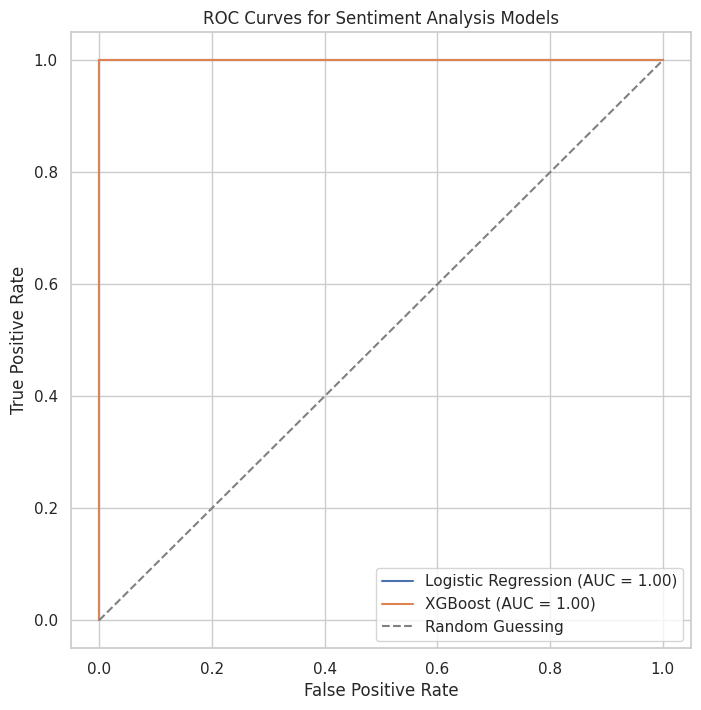

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from xgboost import XGBClassifier
from sklearn.preprocessing import label_binarize
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression

# Assuming you have a CSV file named 'restaurant_reviews_with_sentiment.csv' with columns 'Rating' and 'sentiment'
senti_df = pd.read_csv('restaurant_reviews_with_sentiment.csv')

# Split the data into features (X) and target (y)
X = senti_df['Rating'].values.reshape(-1, 1)  # Reshape to ensure it's a 2D array
y = senti_df['sentiment']

# Use label encoding to convert string labels to numeric values
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Logistic Regression Model
logreg_model = LogisticRegression()
logreg_model.fit(X_train, y_train)

# XGBoost Model
xgb_model = XGBClassifier(num_class=len(set(y_encoded)))
xgb_model.fit(X_train, y_train)

# Convert the labels to binary format
y_bin_logreg = label_binarize(y_test, classes=logreg_model.classes_)
y_bin_xgb = label_binarize(y_test, classes=xgb_model.classes_)

# Plot ROC curves for Logistic Regression and XGBoost for each class
plt.figure(figsize=(8, 8))

# Logistic Regression
fpr_logreg, tpr_logreg, _ = roc_curve(y_bin_logreg[:, 1], logreg_model.predict_proba(X_test)[:, 1])
roc_auc_logreg = auc(fpr_logreg, tpr_logreg)
plt.plot(fpr_logreg, tpr_logreg, label=f'Logistic Regression (AUC = {roc_auc_logreg:.2f})')

# XGBoost
fpr_xgb, tpr_xgb, _ = roc_curve(y_bin_xgb[:, 1], xgb_model.predict_proba(X_test)[:, 1])
roc_auc_xgb = auc(fpr_xgb, tpr_xgb)
plt.plot(fpr_xgb, tpr_xgb, label=f'XGBoost (AUC = {roc_auc_xgb:.2f})')


# Plot ROC curve for random guessing (baseline)
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Guessing')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Sentiment Analysis Models')
plt.legend()
plt.show()
